# **Public Transportation Transjakarta Users Analysis**
---

# **Background**

PT. Transjakarta merupakan perusahaan transportasi umum yang mengoperasikan berbagai layanan seperti BRT (*Bus Rapid Transit*), Non BRT, Royal Trans, Mikrotrans, Bus Wisata Terpadu, dan Transjabodetabek di wilayah Jakarta dan sekitarnya. Dalam upaya untuk terus meningkatkan kualitas layanan dan efisiensi operasional, PT. Transjakarta melakukan evaluasi bulanan sebagai bentuk *continuous improvement*. Evaluasi ini penting untuk memantau dan meningkatkan kinerja armada serta operasional trayek dan halte perjalanan Transjakarta, terutama seiring meningkatnya mobilitas penduduk Jakarta yang memerlukan transportasi publik yang andal dan efisien.

Namun, PT. Transjakarta masih dihadapkan pada beberapa permasalahan seperti *overcrowding* pada trayek dan waktu tertentu, masalah kualitas infrastruktur, keluhan aksesibilitas halte yang sulit, dan fasilitas yang kurang ramah lingkungan bagi lansia. Selain itu, tanggung jawab PT. Transjakarta dalam perlindungan terhadap kejahatan seksual di area operasional juga menjadi perhatian serius.

Sebagai salah satu respons terhadap fenomena ini, optimalisasi kinerja armada dan operasional trayek/halte perjalanan menjadi kunci dalam memberikan pengalaman perjalanan yang nyaman dan handal kepada para penumpang. Oleh karena itu, sebagai seorang Analis Data di PT. Transjakarta, tugas kita adalah memberikan rekomendasi untuk evaluasi bulanan guna mengoptimalkan kinerja armada dan operasional trayek/halte berdasarkan data yang tersedia dan masalah yang ada. Dengan demikian, TransJakarta diharapkan dapat memenuhi kebutuhan penumpangnya untuk pengalaman transportasi yang lebih baik dan menjadi pilihan transportasi publik yang andal dan efisien.

# **Problem Statement**

Dengan terus meningkatnya jumlah pengguna di Jakarta yang mengandalkan transportasi umum, maka penggunaan Transjakarta juga cenderung akan meningkat. Meskipun transportasi umum memiliki peran krusial dalam meningkatkan mobilitas dan kemandirian para pengguna, terdapat sejumlah tantangan yang dihadapi saat menggunakan layanan tersebut. Tantangan tersebut melibatkan berbagai aspek, seperti masalah aksesibilitas, kekhawatiran akan keamanan, dan ketidakpastian pelayanan.

Tujuan dari analisis data ini adalah untuk mengidentifikasi dan memahami kebutuhan dengan harapan dapat meningkatkan pengalaman menggunakan transportasi umum, khususnya Transjakarta. Hal ini melibatkan analisis terhadap beberapa aspek, antara lain:

1. Pola Penggunaan: Memahami frekuensi, waktu, dan rute yang paling sering digunakan oleh pengguna. Hal ini dapat membantu mengidentifikasi jam sibuk dan rute dengan penggunaan tertinggi bagi pengguna TransJakarta.

2. Aksesibilitas dan Kenyamanan: Mengevaluasi kemudahan akses ke dan dari halte dan stasiun Transjakarta.

3. Langkah-langkah Keamanan: Menilai langkah-langkah keamanan yang telah diimplementasikan, termasuk namun tidak terbatas pada kemudahan naik-turun, ketersediaan pegangan tangan, dan langkah-langkah untuk mencegah kepadatan.

4. Kualitas Layanan: Menganalisis kehandalan dan efisiensi layanan, termasuk waktu tunggu, waktu perjalanan, dan gangguan pelayanan.

Analisis yang dihasilkan ini akan sangat berperan dalam memberikan strategi dan intervensi yang bertujuan meningkatkan pengalaman menggunakan transportasi umum bagi pengguna di Jakarta. Hal ini sejalan dengan komitmen PT. Transjakarta untuk terus melakukan perbaikan dan memberikan layanan transportasi umum yang berkualitas tinggi, mudah diakses, dan aman bagi semua penumpangnya.

# **Goals**

Tujuan dari analisis ini ingin mengetahui bagaimana karakteristik pengguna Transjakarta pada bulan April 2023. Selain itu, dari hasil analisis diharapkan dapat memberikan rekomendasi yang dapat diimplementasikan guna meningkatkan pengalaman transportasi bagi pengguna TransJakarta. Sehingga diharapkan nantinya dapat menempatkan Transjakarta sebagai pilihan moda transportasi utama yang digunakan pengguna.

# **Data**
Untuk menganalisa beberapa pertanyaan diatas, berikut data yang akan di analisa.

In [301]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import calendar

Dataset ini berisi informasi terkait umur, jenis kelamin, asal, tujuan, dan jenis moda transportasi pengguna layanan PT. TransJakarta. Ada 22 kolom di dalam dataset Transjakarta, yaitu:

| **Column Name**  | **Description**                                                          |
| ---------------- | ------------------------------------------------------------------------ |
| transID          | Unique transaction IDs consisting of alphanumeric strings                |
| payCardID        | Unique identifiers for payment cards used in transactions                |
| payCardBank      | Bank names associated with the payment cards                             |
| payCardName      | Names associated with the payment card owners                            |
| payCardSex       | Gender of the payment card owners (M or F)                               |
| payCardBirthDate | Birthdates of the payment card owners                                    |
| corridorID       | IDs representing different travel corridors or routes                    |
| corridorName     | Names of the travel corridors or routes                                  |
| direction        | Binary (0 or 1) representing direction (could indicate travel direction) |
| tapInStops       | IDs or codes for tapping in at specific stops                            |
| tapInStopsName   | Names or descriptions of the tapping-in stops                            |
| tapInStopsLat    | Latitude coordinates of tapping-in stops                                 |
| tapInStopsLon    | Longitude coordinates of tapping-in stops                                |
| topStartSeq      | Sequence of stops indicating the order of their appearance or occurrence |
| tapInTime        | Timestamps indicating the time of entry or tap-in at stops               |
| tapOutStops      | Identifiers or codes for tap-out stops                                   |
| tapOutStopsName  | Names or labels corresponding to the tap-out stop identifiers            |
| tapOutStopsLat   | Latitude coordinates for tap-out stops                                   |
| tapOutStopsLon   | Longitude coordinates corresponding to the tap-out stops                 |
| stopEndSeq       | Sequence of stop endings, indicating the order of stops ending           |
| tapOutTime       | Timestamps indicating the time of exit or tap-out at stops               |
| payAmount        | Numerical column representing payment made for transportation            |

**Berikut 5 Baris teratas dan terbawah dari dataset Transjakarta**

In [302]:
tj = pd.read_csv('Transjakarta.csv')
display(tj.head(),tj.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


# **Data Understanding and Cleaning**

Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi dari dataset Transjakarta.

In [303]:
# Menampilkan informasi terkait :
# Nama kolom,Jumlah Kolom,Type Data,dan informasi lainnya
print(f'Jumlah baris dan kolom di dataset transjakarta adalah {tj.shape}')
tj.info()  

Jumlah baris dan kolom di dataset transjakarta adalah (37900, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       356

In [304]:
display(tj.describe(), tj.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


In [305]:
# Data Unique pada tiap kolom
pd.set_option('display.max_colwidth',None)
listItem = []
for col in tj.columns :
    listItem.append( [col, tj[col].nunique(), tj[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana,

Secara umum, kita bisa melihat bahwa:
* dataset transjakarta memiliki 22 kolom dan 37.900 baris
* dataset memiliki periode waktu dari 1 April 2023 hingga 30 April 2023
* beberapa kolom, yaitu, `corridorID`, `corridorName`, `tapInStops`, `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`,`stopEndSeq`,`tapOutTime`, dan `payAmount` ,  memiliki data yang kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data NaN dan akan dilakukan tahapan selanjutnya.
* pada kolom `tapInTime` dan `tapOutTime` tipe data masih berbentuk object dan perlu di ubah ke tipe data dengan format time
* kolom `payAmount` terdapat 3 value yaitu 0, 3500, dan 20000 yang apabila dihubungkan dengan `corridorID` dapat menjawab jenis moda transportasi yang digunakan, apakah JakLingko, TransJakarta ataupun Royal Bus
* dari table Unique, dapat dilihat nilai unik dari masing-masing variable. Dari data unik yang ada, terlihat bahwa masih ada ketidaksesuaian jumlah unik antara `corridorID` dan `CorridorName` yang seharusnya memiliki jumlah Nunique yang sama. Sehingga, diperlukan tahapan selanjutnya

## Duplicate Check

Setelah memahami Raw data, perlu dilakukan treatment tertentu pada data sebelum dapat dianalisis, hal yang pertama dilakukan adalah mengecek duplikasi data.

In [306]:
# Duplicated Data
duplicates = tj[tj.duplicated()]

if not duplicates.empty:
    print("Duplicated rows:")
    print(duplicates)
else:
    print("No duplicated rows found.")

No duplicated rows found.


Dari hasil cek duplikasi secara keseluruhan dapat diketahui bahwa tidak terdapat data duplikat.

## Missing Value

In [307]:
tj.isna().sum()/tj.shape[0]*100

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.316623
corridorName        5.092348
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64

<Axes: >

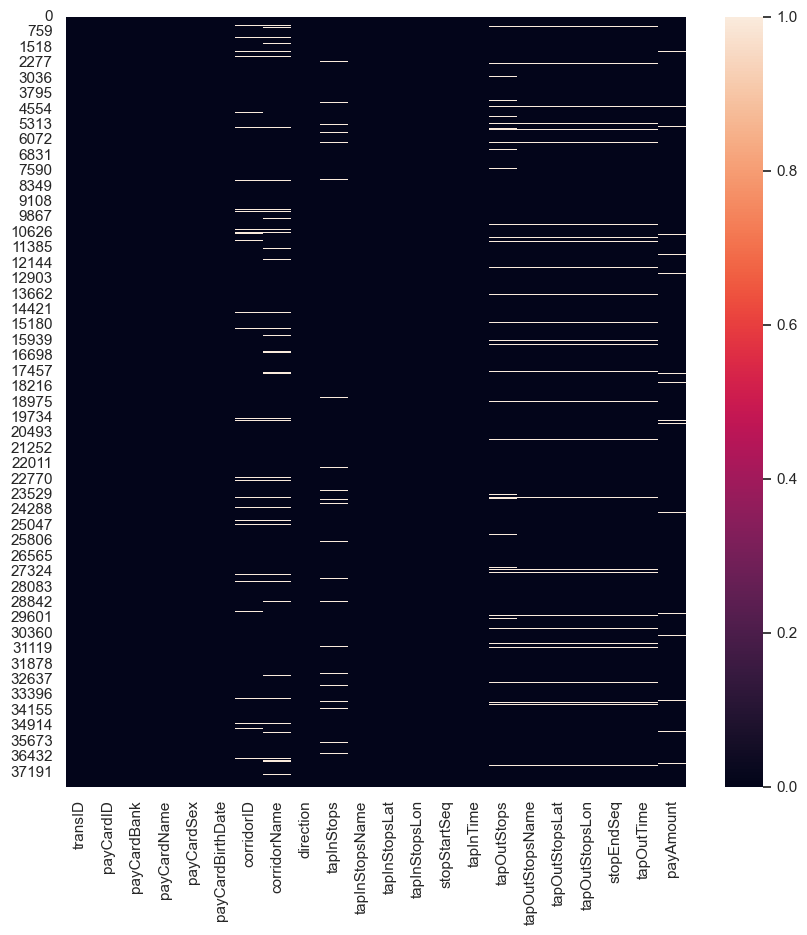

In [308]:
plt.figure(figsize=(10,10))
sns.heatmap(tj[['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex', 'payCardBirthDate', 'corridorID', 'corridorName', 'direction', 'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon', 'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime', 'payAmount']].isna())

Secara garis besar:  
* *missing value* di kolom `payAmount` menjadi *missing value* terkecil(2.66%), dengan missing value di kolom `tapOutStops` menjadi yang tertinggi (6.04%).
* *missing value* di kolom `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq` dan `tapOutTime` memiliki sebaran yang terlihat berkaitan, jika data di `tapOutTime` kosong, maka data di `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq` juga kosong.

Ada 2 cara untuk menangani *missing value*:
* pertama, mengisi data yang hilang. Cara ini lebih disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi *missing value*, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli dan jika data memilki type object, data masih bisa di isi dengan yang berkaitan dengan data dari kolom yang lain contohnya seperti `corridorID` dengan `corridorName` yang masih berkesinambungan, jadi jika di `corridorID` kosong, bisa mengambil value yang sama di baris yang lain, begitu juga `corridorName`.
* kedua, menghapus baris/kolom yang berisi *missing value*. Cara ini tidak disarankan dalam kasus kita, karena *missing value* masih bisa di isi dengan bagian dari kolom lainnya.

Dalam kasus data ini, pengisian missing value banyak menggunakan kolom lain yang berhubungan melalui metode mapping, oleh karena itu, dalam proses pengisian akan dibuat rules bahwa kolom dapat dilakukan pengisian dengan mapping apabila kolom yang dibenchmark tidak kosong. Jika kosong, kemungkinan akan diisi dengan mapping berdasarkan kolom lain atau akan di drop

## 1. Cleaning 1 'corridorID'

Missing value pada kolom corridorID yaitu sebesar 3.3% data. 
Missing value tersebut dapat diisi berdasarkan mapping `corridorName` dan juga mapping lokasi halte berupa `latitude` dan `longitude`.
`corridorID` dan `corridorName` saling mewakilkan dimana satu corridorName akan memiliki satu corridorID.
`latitude` dan `longitude` dapat menunjukkan titik lokasi koridor tersebut berada

In [309]:
tj.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

a. Missing Value `corridorID` menggunakan mapping `corridorName`

In [310]:
corridor_id_map1 = tj.dropna(subset=['corridorID']).drop_duplicates('corridorName').set_index('corridorName')['corridorID']

def fill_missing_corridor_id(row):
    return corridor_id_map1.get(row['corridorName']) if pd.isnull(row['corridorID']) and pd.notnull(row['corridorName']) else row['corridorID']

In [311]:
tj['corridorID'] = tj.apply(fill_missing_corridor_id, axis=1)

b. Missing Value corridorID menggunakan mapping tapInStopsLat dan tapInStopsLon

In [312]:
corridor_id_map2 = tj.dropna(subset=['corridorID']).drop_duplicates(['tapInStopsLat', 'tapInStopsLon']).set_index(['tapInStopsLat', 'tapInStopsLon'])['corridorID']

def fill_missing_corridor_id1(row):
    return corridor_id_map2.get((row['tapInStopsLat'], row['tapInStopsLon'])) if pd.isnull(row['corridorID']) and pd.notnull(row['tapInStopsLat']) and pd.notnull(row['tapInStopsLon']) else row['corridorID']

In [313]:
tj['corridorID'] = tj.apply(fill_missing_corridor_id1, axis=1)

In [314]:
tj.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID            33
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

## 2. Cleaning 2 'corridorName'
missing value pada kolom `corridorName` adalah sekitar 5% data. 
data yang kosong tersebut diisi berdasarkan mapping dengan corridorID karena keduanya bisa saling mengisi.
`corridorID` dan `corridorName` saling mewakilkan dimana satu corridorName akan memiliki satu corridorID.


In [315]:
tj.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID            33
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [316]:
corridor_name_map = tj.dropna(subset=['corridorName']).drop_duplicates('corridorID').set_index('corridorID')['corridorName']

def fill_missing_corridor_name(row):
    return corridor_name_map.get(row['corridorID']) if pd.isnull(row['corridorName']) and pd.notnull(row['corridorID']) else row['corridorName']

In [317]:
tj['corridorName'] = tj.apply(fill_missing_corridor_name, axis=1)

In [318]:
tj.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID            33
corridorName          33
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

## 3. Cleaning 3 'tapInStops'

Untuk mengatasi missing value pada kolom tapInStops atau ID halte titik awal, dapat dilakukan pengisian berdasarkan pemetaan lokasi halte menggunakan nilai latitude dan longitude yang tersedia. Pendekatan ini dipilih karena latitude dan longitude pada halte tap in dapat berfungsi sebagai representasi lokasi dari tapInStop.

In [319]:
tj.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID            33
corridorName          33
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [320]:
tap_in_stops_map = tj.dropna(subset=['tapInStops']).drop_duplicates(['tapInStopsLon', 'tapInStopsLat']).set_index(['tapInStopsLon', 'tapInStopsLat'])['tapInStops']

def fill_missing_tapInStops(row):
    return tap_in_stops_map.get((row['tapInStopsLon'], row['tapInStopsLat'])) if pd.isnull(row['tapInStops']) and pd.notnull(row['tapInStopsLon']) and pd.notnull(row['tapInStopsLat']) else row['tapInStops']

In [321]:
tj['tapInStops'] = tj.apply(fill_missing_tapInStops, axis=1)

In [322]:
tj.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID            33
corridorName          33
direction              0
tapInStops            34
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

## 4. Cleaning 4 'tapOutStops'

Untuk mengatasi missing value pada kolom tapOutStops atau ID halte titik akhir, dapat dilakukan pengisian berdasarkan pemetaan lokasi halte menggunakan nilai latitude dan longitude yang tersedia. Pendekatan ini dipilih karena latitude dan longitude pada halte tap in dapat berfungsi sebagai representasi lokasi dari tapOutStop.

In [323]:
tj.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID            33
corridorName          33
direction              0
tapInStops            34
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [324]:
tap_out_stops_map = tj.dropna(subset=['tapOutStops']).drop_duplicates(['tapOutStopsLon', 'tapOutStopsLat']).set_index(['tapOutStopsLon', 'tapOutStopsLat'])['tapOutStops']

def fill_missing_tapOutStops(row):
    return tap_out_stops_map.get((row['tapOutStopsLon'], row['tapOutStopsLat'])) if pd.isnull(row['tapOutStops']) and pd.notnull(row['tapOutStopsLon']) and pd.notnull(row['tapOutStopsLat']) else row['tapOutStops']

In [325]:
tj['tapOutStops'] = tj.apply(fill_missing_tapOutStops, axis=1)

In [326]:
tj.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID            33
corridorName          33
direction              0
tapInStops            34
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         1363
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

## 5. Cleaning 5 'tapOutStopsName'

Missing value tapOutStopsName atau nama halte tap out diisi berdasarkan mapping dengan tapOutStops, karena keduanya dapat saling mewakilkan.

In [327]:
tj.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID            33
corridorName          33
direction              0
tapInStops            34
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         1363
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [328]:
tap_out_stops_name_map = tj.dropna(subset=['tapOutStopsName']).drop_duplicates('tapOutStops').set_index('tapOutStops')['tapOutStopsName']

def fill_missing_tapOutStopsName(row):
    return tap_out_stops_name_map.get(row['tapOutStops']) if pd.isnull(row['tapOutStopsName']) and pd.notnull(row['tapOutStops']) else row['tapOutStopsName']

In [329]:
tj['tapOutStopsName'] = tj.apply(fill_missing_tapOutStopsName, axis=1)

In [330]:
tj.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID            33
corridorName          33
direction              0
tapInStops            34
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         1363
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

## 6. Cleaning 6 'tapOutStopsLat' dan 'tapOutStopsLon'
Missing value tapOutStopsLat dan tapOutStopsLon atau latitude dan longitude halte tapOut diisi berdasarkan mapping dengan tapOutStops. Hal ini dikarenakan latitude dan longitude pada halte tap out dapat saling merepresentasikan lokasi tapOuStop, dan satu latitude dan longitude dapat digunakan untuk menentukan satu nama dan lokasi tap out stops itu sendiri.


In [331]:
tj.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID            33
corridorName          33
direction              0
tapInStops            34
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         1363
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [332]:
tap_out_stops_lat_map = tj.dropna(subset=['tapOutStopsLat']).drop_duplicates('tapOutStops').set_index('tapOutStops')['tapOutStopsLat']

def fill_missing_tapOutStopsLat(row):
    return tap_out_stops_lat_map.get(row['tapOutStops']) if pd.isnull(row['tapOutStopsLat']) and pd.notnull(row['tapOutStops']) else row['tapOutStopsLat']

tj['tapOutStopsLat'] = tj.apply(fill_missing_tapOutStopsLat, axis=1)

In [333]:
tap_out_stops_lon_map = tj.dropna(subset=['tapOutStopsLon']).drop_duplicates('tapOutStops').set_index('tapOutStops')['tapOutStopsLon']

def fill_missing_tapOutStopsLon(row):
    return tap_out_stops_lon_map.get(row['tapOutStops']) if pd.isnull(row['tapOutStopsLon']) and pd.notnull(row['tapOutStops']) else row['tapOutStopsLon']

tj['tapOutStopsLon'] = tj.apply(fill_missing_tapOutStopsLon, axis=1)

In [334]:
tj.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID            33
corridorName          33
direction              0
tapInStops            34
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         1363
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

## 7. Cleaning 7 'PayAmount'

Missing value diisi berdasarkan mapping dengan corridorID dan corridorName. Hal ini dikarenakan setiap koridor memiliki harga yang unik dan dapat merepresentasikan antara satu sama lainnya

In [335]:
tj.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID            33
corridorName          33
direction              0
tapInStops            34
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         1363
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [336]:
missing_pay_amount = tj[tj['payAmount'].isna()]
unique_corridor_ids = missing_pay_amount['corridorID'].unique()
unique_corridor_names = missing_pay_amount['corridorName'].unique()

print("Unique Corridor IDs with Missing PayAmount:")
print(unique_corridor_ids)

print("\nUnique Corridor Names with Missing PayAmount:")
print(unique_corridor_names)

Unique Corridor IDs with Missing PayAmount:
['M7B' 'JAK.48B' '3H' 'JAK.48A' 'M1H' '6Q' '9D' '6D' 'B13' 'M3' '6C']

Unique Corridor Names with Missing PayAmount:
['BKN - Blok M' 'Stasiun Tebet - Kampung Melayu' 'Jelambar - Kota'
 'Stasiun Tebet - Rusun Karet Tengsin' 'Tanah Abang - St. Gondangdia'
 'Dukuh Atas - Casablanca via Epicentrum Raya'
 'Pasar Minggu - Tanah Abang' 'Stasiun Tebet - Karet via Underpass'
 'Bekasi Barat - Blok M' 'Kalideres - Bundaran HI via Veteran'
 'Stasiun Tebet - Karet via Patra Kuningan']


In [337]:
pay_amount_map1 = tj.dropna(subset=['payAmount']).drop_duplicates('corridorID').set_index('corridorID')['payAmount']

def fill_missing_pay_amount(row):
    return pay_amount_map1.get(row['corridorID']) if pd.isnull(row['payAmount']) and pd.notnull(row['corridorID']) else row['payAmount']

tj['payAmount'] = tj.apply(fill_missing_pay_amount, axis=1)

In [338]:
pay_amount_map2 = tj.dropna(subset=['payAmount']).drop_duplicates('corridorName').set_index('corridorName')['payAmount']

def fill_missing_pay_amount1(row):
    return pay_amount_map2.get(row['corridorName']) if pd.isnull(row['payAmount']) and pd.notnull(row['corridorName']) else row['payAmount']

tj['payAmount'] = tj.apply(fill_missing_pay_amount1, axis=1)

In [339]:
tj.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID            33
corridorName          33
direction              0
tapInStops            34
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         1363
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount              0
dtype: int64

Setelah missing value diisi, ternyata masih terdapat beberapa sisa missing value sebesar kurang lebih 3% dari missing value awal sekitar 6%. Sisa missing value yang tidak terisi dikarenakan kolom tidak memiliki syarat rules yaitu dapat dilakukan pengisian dengan mapping apabila kolom yang dibenchmark tidak kosong. 
Oleh karena itu, baris dengan nilai yang kosong selanjutnya akan di drop.

In [340]:
tj = tj.dropna(subset=['corridorID', 'tapInStops', 'tapOutStops', 'stopEndSeq', 'tapOutTime'])

## Normal Distribution Check

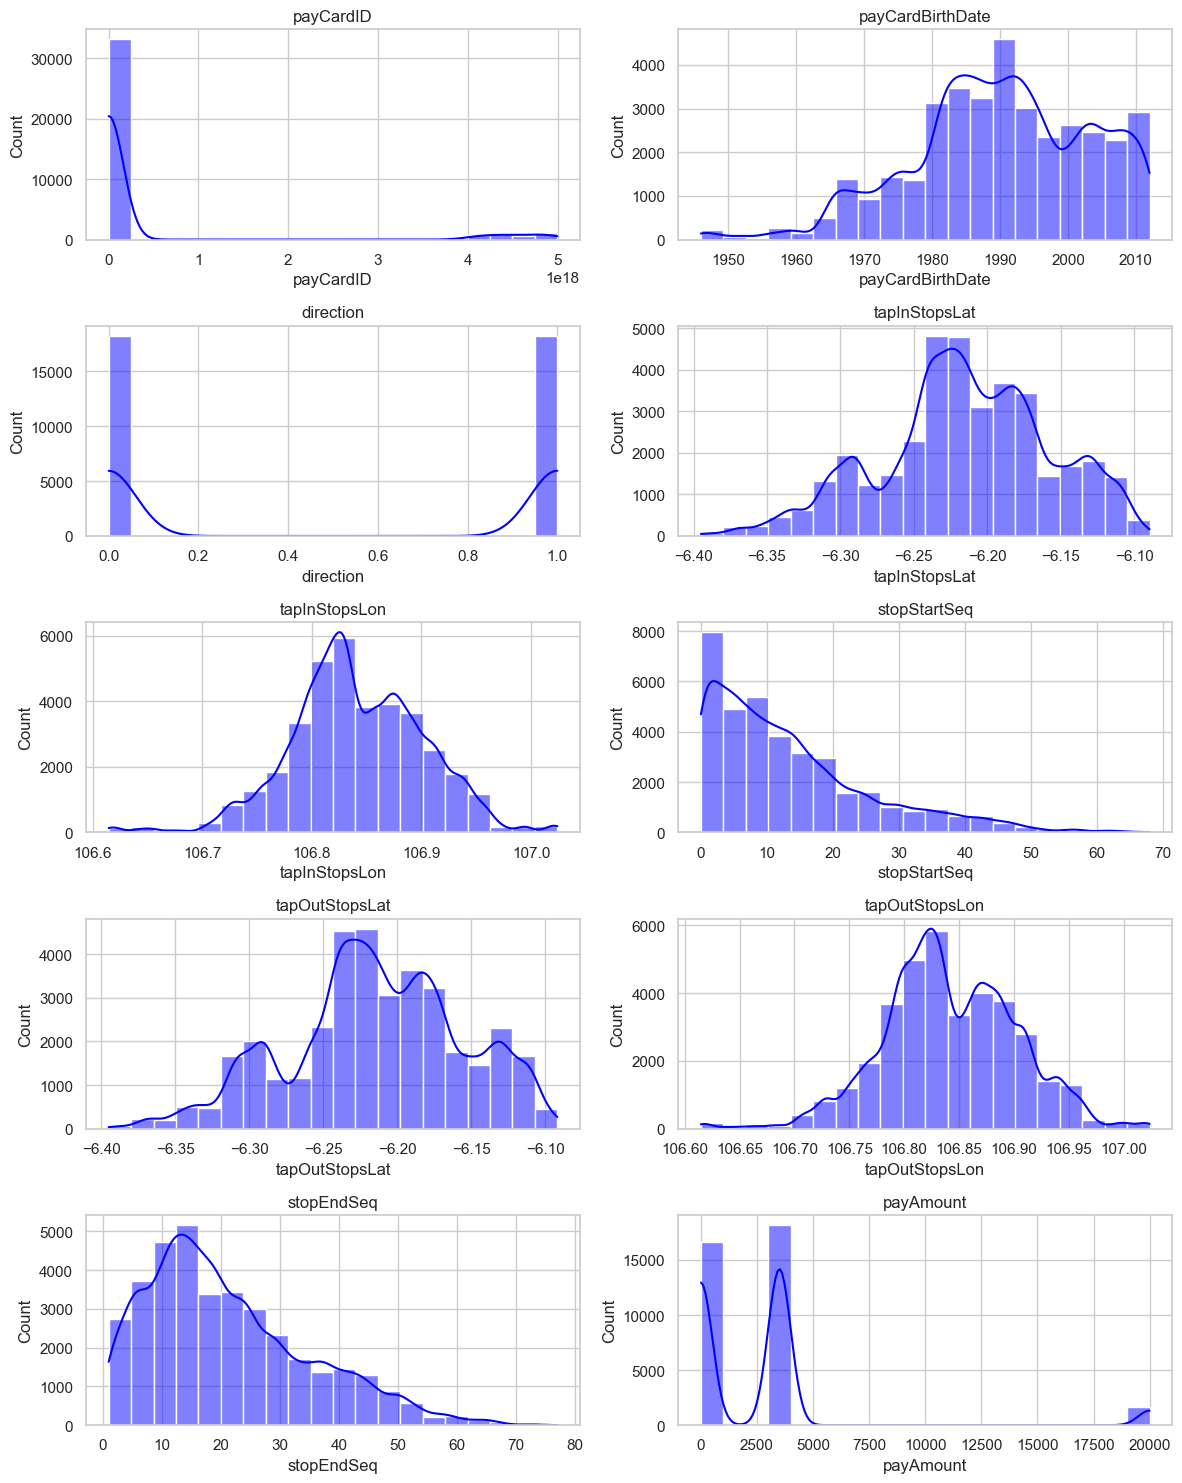

In [341]:
#Normal Distribution

numerical_cols = tj.select_dtypes(include=['float64', 'int64']).columns
num_cols = len(numerical_cols)
num_rows = (num_cols + 1) // 2  
fig, axs = plt.subplots(num_rows, 2, figsize=(12, num_rows * 3))
axs = axs.ravel()

for i, col in enumerate(numerical_cols):
    sns.histplot(tj[col].dropna(), bins=20, kde=True, ax=axs[i], color='blue')
    axs[i].set_title(col)

if num_cols % 2 != 0:
    fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()

In [342]:
# Uji Normalitas
from scipy.stats import kstest

column_test = ['payCardBirthDate','stopStartSeq','stopEndSeq','payAmount']

list = []

for i in column_test : 
    ks,pvalue = kstest((tj[i]), 'norm')
    if pvalue> 0.05:
        list.append([i,round(pvalue,3), ' berdistribusi normal'])
    else :
        list.append([i,round(pvalue,3), 'berdistribusi tidak normal'])

print('Jika p-value < 0,05 maka data berdistribusi tidak normal')
print('Jika p-value > 0,05 maka data berdistribusi normal')
print(f'\n')
print('Hasil Uji Normalitas')
pd.DataFrame(list, columns =[['Nama kolom','p-value','Distribusi']])

Jika p-value < 0,05 maka data berdistribusi tidak normal
Jika p-value > 0,05 maka data berdistribusi normal


Hasil Uji Normalitas


,Nama kolom,p-value,Distribusi
0,payCardBirthDate,0.0,berdistribusi tidak normal
1,stopStartSeq,0.0,berdistribusi tidak normal
2,stopEndSeq,0.0,berdistribusi tidak normal
3,payAmount,0.0,berdistribusi tidak normal


1. payCardID: Histogram ini memiliki puncak tunggal yang menonjol, menunjukkan bahwa ada ID umum yang muncul lebih sering daripada yang lain.
2. direction: Histogram ini menunjukkan dua puncak yang berbeda, menandakan dua arah atau kategori utama.
3. tapintStopLat dan tapintStopLon: Histogram ini merepresentasikan data geografis dengan beberapa puncak, menunjukkan adanya klaster lokasi di mana tap sering terjadi.
4. stopStartSeq dan stopEndSeq: Histogram ini menunjukkan urutan berhenti dengan frekuensi yang bervariasi.
5. tapOutStopLat dan tapOutStopLon: Mirip dengan histogram "tapintStopLat" dan "tapintStopLon", ini juga merepresentasikan data geografis.
6. payAmount: Histogram ini menunjukkan jumlah pembayaran dengan satu puncak menonjol, menunjukkan jumlah pembayaran umum.

Dari histogram dan uji normalitas, dapat disimpulkan bahwa distribusi kolom numerik dalam dataset ini tidak berdistribusi normal

## Data Outliers Check

Outlier adalah data yang signifikan dalam perbedaannya dari data observasi lainnya. Outlier dapat memengaruhi hasil pengambilan keputusan setelah analisis dilakukan. Ada beberapa faktor yang menyebabkan munculnya data outlier, seperti kesalahan input data, fakta di lapangan memang seperti itu, subjek tidak memahami unit pertanyaan, dan sebagainya.

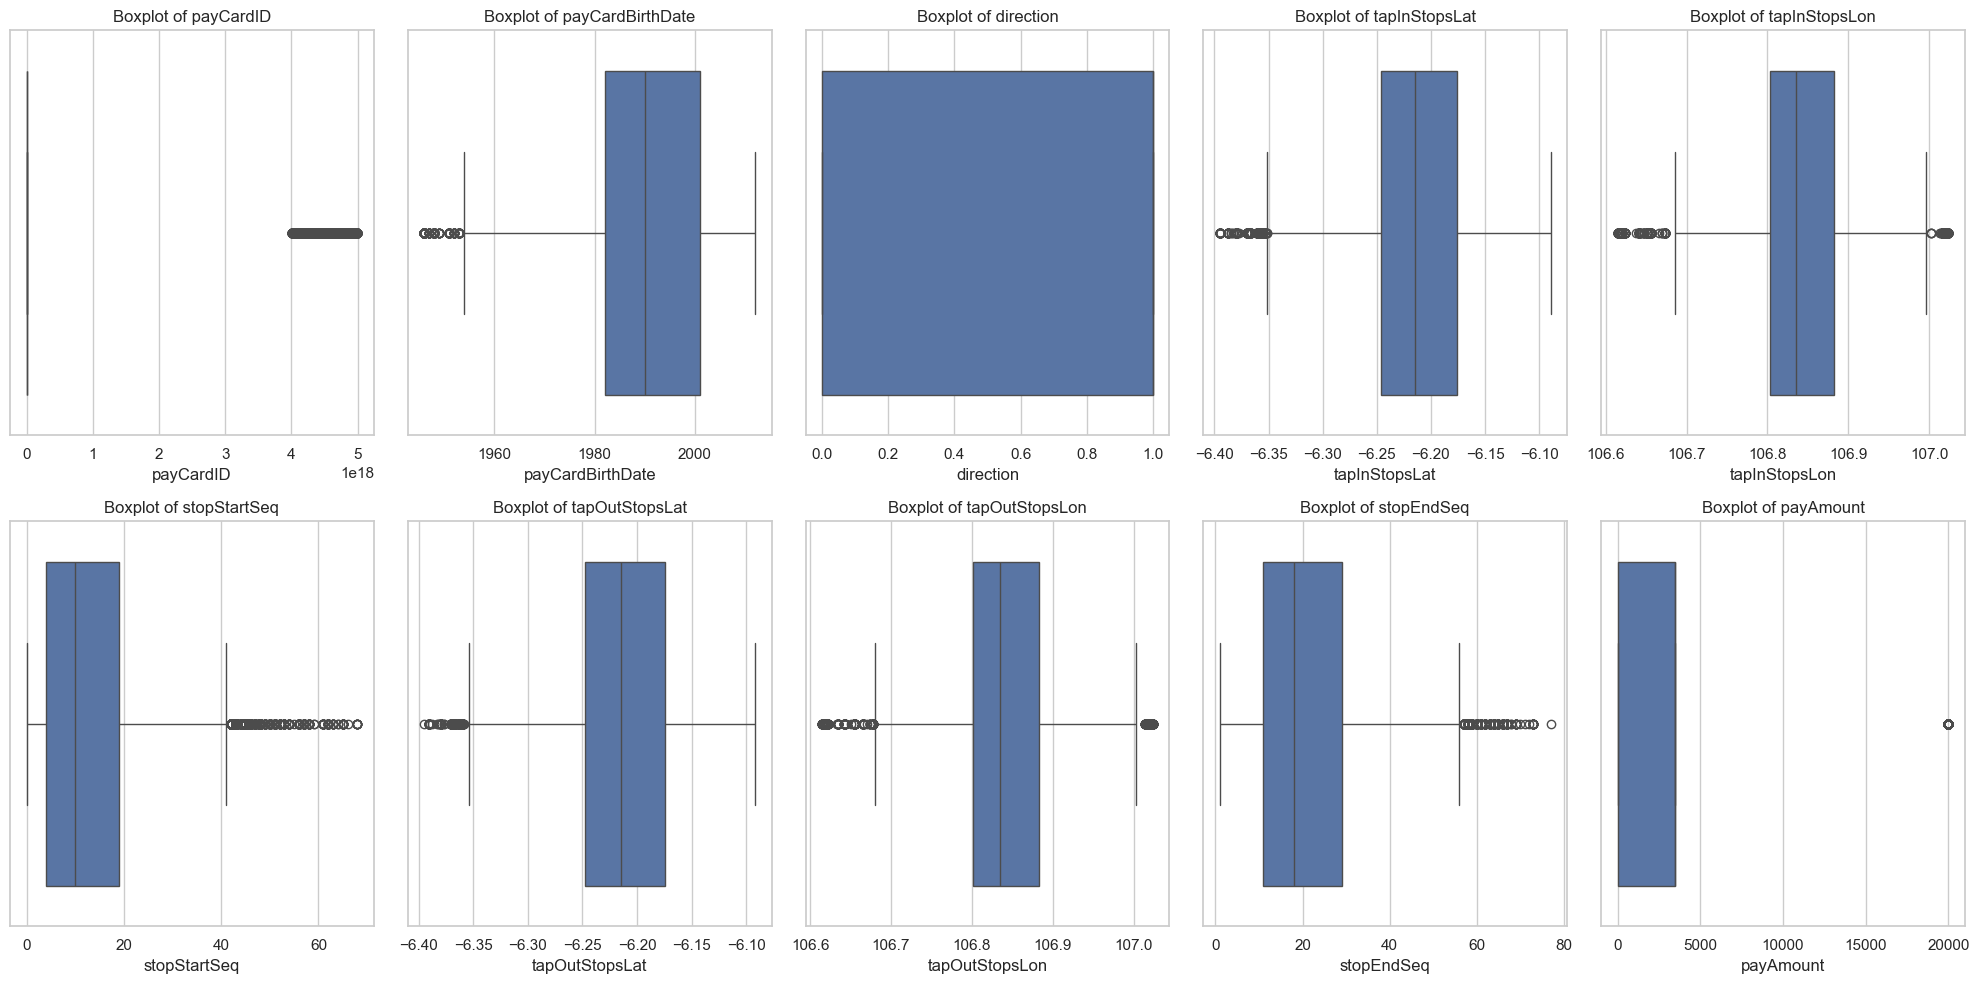

In [343]:
numerical_columns = tj.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for i, column in enumerate(numerical_columns):
    sns.boxplot(x=tj[column], ax=axes[i // 5, i % 5])
    axes[i // 5, i % 5].set_title(f'Boxplot of {column}')
    axes[i // 5, i % 5].set_xlabel(column)

plt.tight_layout()
plt.show()

In [344]:
outliers_info = {}

for column in numerical_columns:
    Q1 = tj[column].quantile(0.25)
    Q3 = tj[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_condition = (tj[column] < lower_bound) | (tj[column] > upper_bound)
    outliers = tj[outliers_condition]
    
    outliers_info[column] = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'number_of_outliers': outliers_condition.sum(),
        'outliers_indices': outliers.index.tolist()
    }


outliers_summary = {key: {'bounds': (value['lower_bound'], value['upper_bound']), 
                          'number_of_outliers': value['number_of_outliers']} 
                    for key, value in outliers_info.items()}

outliers_summary_tj = pd.DataFrame.from_dict(outliers_summary, orient='index')
outliers_summary_tj[['lower_bound', 'upper_bound']] = outliers_summary_tj['bounds'].apply(pd.Series)
outliers_summary_tj.drop('bounds', axis=1, inplace=True)
outliers_summary_tj = outliers_summary_tj[['lower_bound', 'upper_bound', 'number_of_outliers']]


styled_table = outliers_summary_tj.style.format('{:.0f}')
styled_table

,lower_bound,upper_bound,number_of_outliers
payCardID,-6589742956399379,11463013381725524,3390
payCardBirthDate,1954,2030,326
direction,-2,2,0
tapInStopsLat,-6,-6,394
tapInStopsLon,107,107,538
stopStartSeq,-18,42,1483
tapOutStopsLat,-6,-6,359
tapOutStopsLon,107,107,447
stopEndSeq,-16,56,577
payAmount,-5250,8750,1688


Dari pengecekan outlier baik dapat disimpulkan bahwa beberapa kolom memiliki outlier. Namun terdapat kolom yang harus diperhatikan seperti:
a. Outlier pada payCardID: Hal ini bisa menjadi perhatian jika mewakili kesalahan dalam penginputan data atau jika tidak sesuai dengan rentang yang diharapkan dari identifikasi kartu pembayaran.
b. Outlier pada payAmount: Jika outlier ini sangat ekstrem dan tidak mencerminkan jumlah pembayaran yang biasa, hal ini bisa memengaruhi analisis tren atau perilaku pembayaran.

Namun, untuk kolom lain seperti direction, tapInStopsLat, tapInStopsLon, stopStartSeq, tapOutStopsLat, tapOutStopsLon, dan stopEndSeq, outlier tampaknya kurang ekstrem dan mungkin mewakili titik data yang sah. Jadi, dalam analisis ini, tidak akan menghapus outlier dari dataset ini.

## Data Clean

In [345]:
tj.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36474 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           36474 non-null  object 
 1   payCardID         36474 non-null  int64  
 2   payCardBank       36474 non-null  object 
 3   payCardName       36474 non-null  object 
 4   payCardSex        36474 non-null  object 
 5   payCardBirthDate  36474 non-null  int64  
 6   corridorID        36474 non-null  object 
 7   corridorName      36474 non-null  object 
 8   direction         36474 non-null  float64
 9   tapInStops        36474 non-null  object 
 10  tapInStopsName    36474 non-null  object 
 11  tapInStopsLat     36474 non-null  float64
 12  tapInStopsLon     36474 non-null  float64
 13  stopStartSeq      36474 non-null  int64  
 14  tapInTime         36474 non-null  object 
 15  tapOutStops       36474 non-null  object 
 16  tapOutStopsName   36474 non-null  object 
 17

Sebelum dibersihkan, kita memiliki 37900 baris data, sekarang kita memiliki 36474 baris. Data yang sebelumnya kosong kita isi dengan nilai yang sebenarnya atau sedekat mungkin dengan nilai asli. Kemudian untuk sisanya, sekitar 1426 baris data yang kosong dihapus.

## Data Transformation and Categorizing

Dari data understanding sebelumnya, terlihat bahwa tapInTime dan tapOutTime memiliki tipe data objek yang perlu diubah. Oleh karena itu, diperlukan pengubahan tipe data. Selain itu, untuk melakukan analisis waktu yang lebih mendalam, waktu dan tanggal perlu dipecah menjadi jam, hari. Berikut adalah modifikasi waktu yang diperlukan:

In [346]:
#Hour
tj['tapInTime'] = pd.to_datetime(tj['tapInTime'])
tj['tapOutTime'] = pd.to_datetime(tj['tapOutTime'])

tj["tapInHour"] = tj["tapInTime"].dt.hour
tj["tapOutHour"] = tj["tapOutTime"].dt.hour

In [347]:
#Day
tj['tapInDay'] = tj['tapInTime'].dt.dayofweek

tapInDay = {
    0: 'Senin',
    1: 'Selasa',
    2: 'Rabu',
    3: 'Kamis',
    4: 'Jumat',
    5: 'Sabtu',
    6: 'Minggu'
}
tj['tapInDay'] = tj['tapInDay'].map(tapInDay)


In [348]:
#Date
tj["tapInWeek"] =tj['tapOutTime'].dt.strftime('%d')

In [349]:
tj.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36474 entries, 0 to 37899
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           36474 non-null  object        
 1   payCardID         36474 non-null  int64         
 2   payCardBank       36474 non-null  object        
 3   payCardName       36474 non-null  object        
 4   payCardSex        36474 non-null  object        
 5   payCardBirthDate  36474 non-null  int64         
 6   corridorID        36474 non-null  object        
 7   corridorName      36474 non-null  object        
 8   direction         36474 non-null  float64       
 9   tapInStops        36474 non-null  object        
 10  tapInStopsName    36474 non-null  object        
 11  tapInStopsLat     36474 non-null  float64       
 12  tapInStopsLon     36474 non-null  float64       
 13  stopStartSeq      36474 non-null  int64         
 14  tapInTime         36474 non

Dapat terlihat bahwa tipe data TapInTime dan TapOutTime telah berubah yang semula object menjadi datetime64[ns]

Selain Waktu, kita juga mengategorisasi moda transportasi TransJakarta menjadi 3 moda berdasarkan biaya yang dikeluarkannya (PayAmount) antara lain 3500 untuk TransJakarta, 20000 untuk Royal Trans dan 0 untuk JakLingko

In [350]:
def typeConvert(x):
    if x == 3500 :
        return 'TransJakarta'
    elif x == 20000 :
        return 'RoyalTrans'
    elif x == 0 :
        return 'Jak Lingko'
    else :
        return x
    
tj['transType']=tj['payAmount'].apply(typeConvert)

Kita juga melakukan kategori pada umur pengguna TransJakarta menjadi 4 kelompok berdasarkan umurnya

In [351]:
tj['age']=2023-tj['payCardBirthDate']

In [352]:
def ageCat(x):
    if x <= 12 :
        return 'Anak-Anak'
    elif x <= 18 :
        return 'Remaja'
    elif x <= 60 :
        return 'Dewasa'
    else :
        return 'Lansia'
    
tj['ageCategory']=tj['age'].apply(ageCat)
tj.head()   

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapInDay,tapInWeek,transType,age,ageCategory
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,12.0,2023-04-03 06:00:53,3500.0,5,6,Senin,03,TransJakarta,15,Remaja
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,21.0,2023-04-03 06:40:01,3500.0,5,6,Senin,03,TransJakarta,26,Dewasa
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,39.0,2023-04-03 06:50:55,3500.0,5,6,Senin,03,TransJakarta,31,Dewasa
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,29.0,2023-04-03 06:28:16,3500.0,5,6,Senin,03,TransJakarta,45,Dewasa
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,15.0,2023-04-03 06:57:03,3500.0,6,6,Senin,03,TransJakarta,41,Dewasa


In [353]:
tj.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapInDay,tapInWeek,transType,age,ageCategory
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,12.0,2023-04-03 06:00:53,3500.0,5,6,Senin,03,TransJakarta,15,Remaja
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,21.0,2023-04-03 06:40:01,3500.0,5,6,Senin,03,TransJakarta,26,Dewasa
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,39.0,2023-04-03 06:50:55,3500.0,5,6,Senin,03,TransJakarta,31,Dewasa
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,29.0,2023-04-03 06:28:16,3500.0,5,6,Senin,03,TransJakarta,45,Dewasa
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,15.0,2023-04-03 06:57:03,3500.0,6,6,Senin,03,TransJakarta,41,Dewasa


# **Data Analysis**

## 1. Penggunaan Tipe Moda TransJakarta

Pertama, akan ditampilkan proporsi jenis transportasi umum PT. TransJakarta yang digunakan pada bulan April 2023

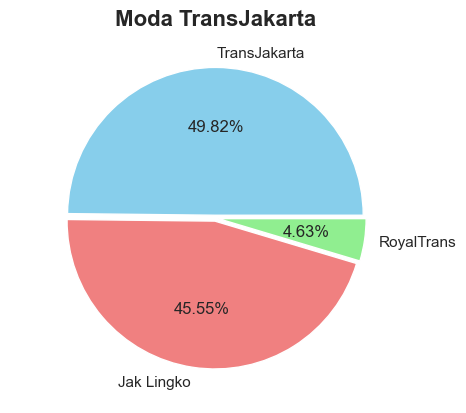

In [354]:
tj['transType'].value_counts().plot(kind='pie', autopct='%.2f%%', explode=(0.02, 0.02, 0.02), colors=['skyblue', 'lightcoral', 'lightgreen'])
# Penamaan judul grafik
plt.title('Moda TransJakarta', fontsize=16, fontweight='bold')
plt.ylabel(' ')
# Menampilkan grafik
plt.show()

Dari grafik diatas dapat disimpulkan bahwa pada bulan April 2023, preferensi penggunaan moda TransJakarta di Jakarta cenderung didominasi oleh Transjakarta dengan persentase sebesar 49.82%, diikuti oleh Jak Lingko dengan persentase 45.55%, dan RoyalTrans menempati posisi terakhir dengan persentase 4.63%. Analisis tarif menunjukkan bahwa preferensi masyarakat Jakarta cenderung tertuju pada transportasi umum dengan harga ekonomis dan efektif, seperti Transjakarta (tarif Rp 3.500) dan Jak Lingko (gratis)

## 2. Profil Pengguna TransJakarta

a. Berdasarkan Jenis Kelamin

In [355]:
#Gender
data_gender = tj['payCardSex'].value_counts().reset_index()
data_gender

data_gender1 = tj.groupby('payCardName')['payCardSex'].value_counts().reset_index(name='count')
data_gender_grup = data_gender1['payCardSex'].value_counts().reset_index()
data_gender_grup

,payCardSex,count
0,F,1055
1,M,924


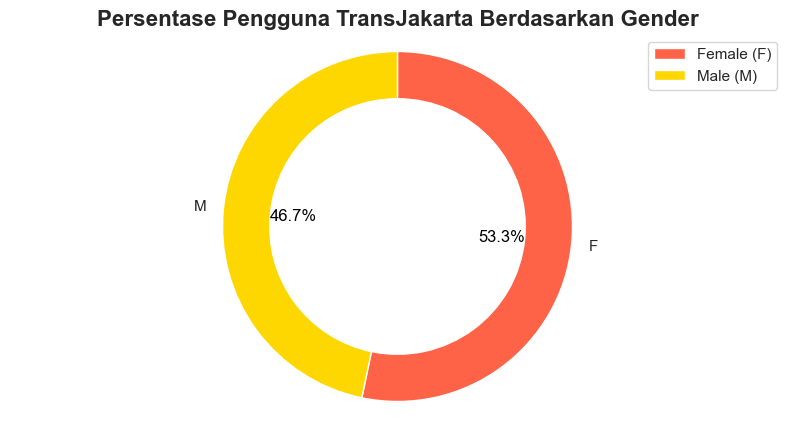

In [356]:
plt.figure(figsize=(10, 5))

custom_colors = ['#FF6347', '#FFD700']

wedges, texts, autotexts = plt.pie(data_gender['count'],
                                   labels=data_gender['payCardSex'],
                                   autopct='%1.1f%%',
                                   startangle=90,
                                   counterclock=False,
                                   wedgeprops=dict(width=0.27, edgecolor='white'),
                                   colors=custom_colors)

for autotext in autotexts:
    autotext.set_color('black') 

plt.axis('equal')
plt.legend(['Female (F)', 'Male (M)'], loc='upper right')
plt.title('Persentase Pengguna TransJakarta Berdasarkan Gender', fontsize=16, fontweight='bold')
plt.show()

Diagram pie di atas menggambarkan proporsi pengguna Transjakarta berdasarkan jenis kelamin. Data berasal dari kolom "payCardSex," dengan asumsi bahwa jenis kelamin pengguna Transjakarta sesuai dengan yang terdaftar pada kepemilikan kartu. Terlihat bahwa proporsi pengguna wanita lebih tinggi sebesar 6.6% dibandingkan dengan proporsi pengguna pria. Meskipun perbedaannya tidak begitu besar, namun dalam konteks kebijakan inklusif TransJakarta, terutama terkait penyediaan armada khusus wanita untuk meningkatkan rasa aman terhadap kejahatan seksual di area operasional, proporsi ini menjadi acuan penting bahwa pengguna wanita masih mendominasi.

b. Persebaran Usia Pengguna TransJakarta

Selain aspek jenis kelamin, analisis terhadap distribusi usia pengguna TransJakarta juga menjadi aspek penting untuk dipertimbangkan. Evaluasi terhadap faktor ini mencakup pemahaman mendalam terhadap kelompok usia pengguna Transjakarta serta kebutuhan khusus yang mungkin dimilikinya. Dengan memahami secara lebih rinci pola usia pengguna Transjakarta, kita dapat mengidentifikasi kebutuhan spesifik yang dapat diakomodasi untuk meningkatkan pengalaman mereka. Contohnya, untuk kelompok usia lanjut, penyesuaian fasilitas seperti peningkatan aksesibilitas, peningkatan kenyamanan tempat duduk, atau dukungan informasi yang lebih mudah dibaca mungkin diperlukan. Analisis lebih lanjut terhadap pesebaran usia ini dapat memberikan dasar yang lebih solid untuk peningkatan layanan dan fasilitas yang lebih tepat sasaran.

In [357]:
Pengguna_KategoriUmur = tj['ageCategory'].value_counts().reset_index()
Pengguna_KategoriUmur

,ageCategory,count
0,Dewasa,29827
1,Remaja,4436
2,Anak-Anak,1477
3,Lansia,734


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10884\2801950802.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='ageCategory',


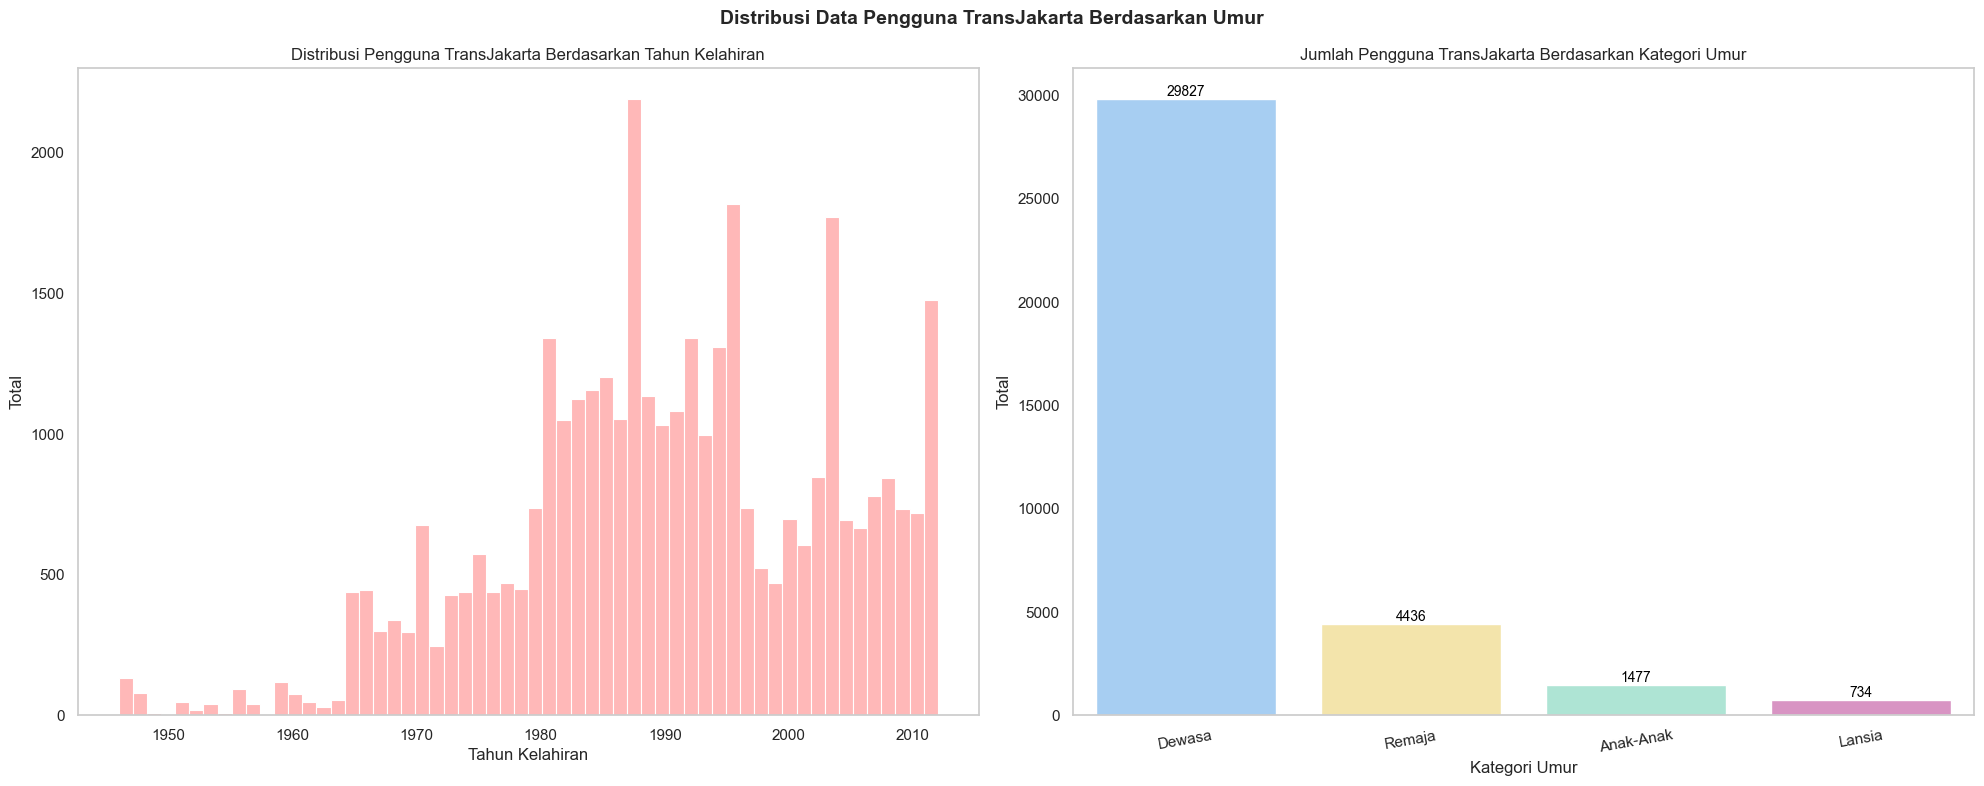

In [358]:
new_colors = ['#FFA0A0', '#9ACFFF', '#FFEB9F', '#A5EDD8', '#E389C7']

figure, axes = plt.subplots(1, 2, figsize=(20, 8))
figure.suptitle('Distribusi Data Pengguna TransJakarta Berdasarkan Umur', size=14, fontweight='bold')

sns.histplot(x='payCardBirthDate', 
             data=tj, 
             ax=axes[0], 
             color=new_colors[0])
axes[0].set_title('Distribusi Pengguna TransJakarta Berdasarkan Tahun Kelahiran')
axes[0].set_xlabel('Tahun Kelahiran') 
axes[0].set_ylabel('Total')  

bar_plot = sns.barplot(x='ageCategory', 
                       y='count', 
                       data=Pengguna_KategoriUmur,
                       ax=axes[1],
                       palette=new_colors[1:])
axes[1].set_title('Jumlah Pengguna TransJakarta Berdasarkan Kategori Umur')
axes[1].set_xlabel('Kategori Umur') 
axes[1].set_ylabel('Total')

for tick in axes[1].get_xticklabels():
    tick.set_rotation(10)

for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.0f}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

axes[0].grid(False)
axes[1].grid(False)
plt.tight_layout()
plt.show()

Dengan asumsi bahwa usia penumpang Transjakarta sesuai dengan yang tercantum pada data payCardBirthDate, hasil pesebaran data menunjukkan dominasi penumpang lahir antara tahun 1980-2008, yang termasuk dalam kategori usia Dewasa dan Remaja. Visualisasi histogram dan bar di atas berfungsi sebagai dukungan atau validasi bahwa memang terdapat pengguna Transjakarta dalam kategori Lansia.

Dalam analisis ini, perhatian difokuskan pada kelompok usia lansia yang membutuhkan fasilitas khusus di wilayah operasional Transjakarta. Meskipun distribusi pengguna Transjakarta didominasi oleh kategori usia dewasa dan remaja, hal ini tidak berarti penyesuaian fasilitas khusus untuk kategori lansia dan anak-anak dapat diabaikan. Sesuai dengan kebijakan transportasi Kementerian Perhubungan, bahwa setiap layanan transportasi harus ramah terhadap lansia, anak-anak, dan orang berkebutuhan khusus. Oleh karena itu, meskipun jumlah penumpang dengan kategori lansia tidak banyak, tingkat urgensi yang tinggi mendorong untuk melakukan evaluasi lebih lanjut terhadap penggunaan Transjakarta berdasarkan kategori usia.

## 3. Kartu Bank Pembayaran Pengguna TransJakarta

In [359]:
# PayCard Bank
jumlah_bank = tj['payCardBank'].value_counts()
jumlah_bank

payCardBank
dki       18015
emoney     6625
brizzi     3390
flazz      3101
online     2765
bni        2578
Name: count, dtype: int64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10884\4059417125.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0], data=tj, y='payCardBank', order=tj['payCardBank'].value_counts().index, palette=colors_countplot)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10884\4059417125.py:6: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.countplot(ax=axes[0], data=tj, y='payCardBank', order=tj['payCardBank'].value_counts().index, palette=colors_countplot)


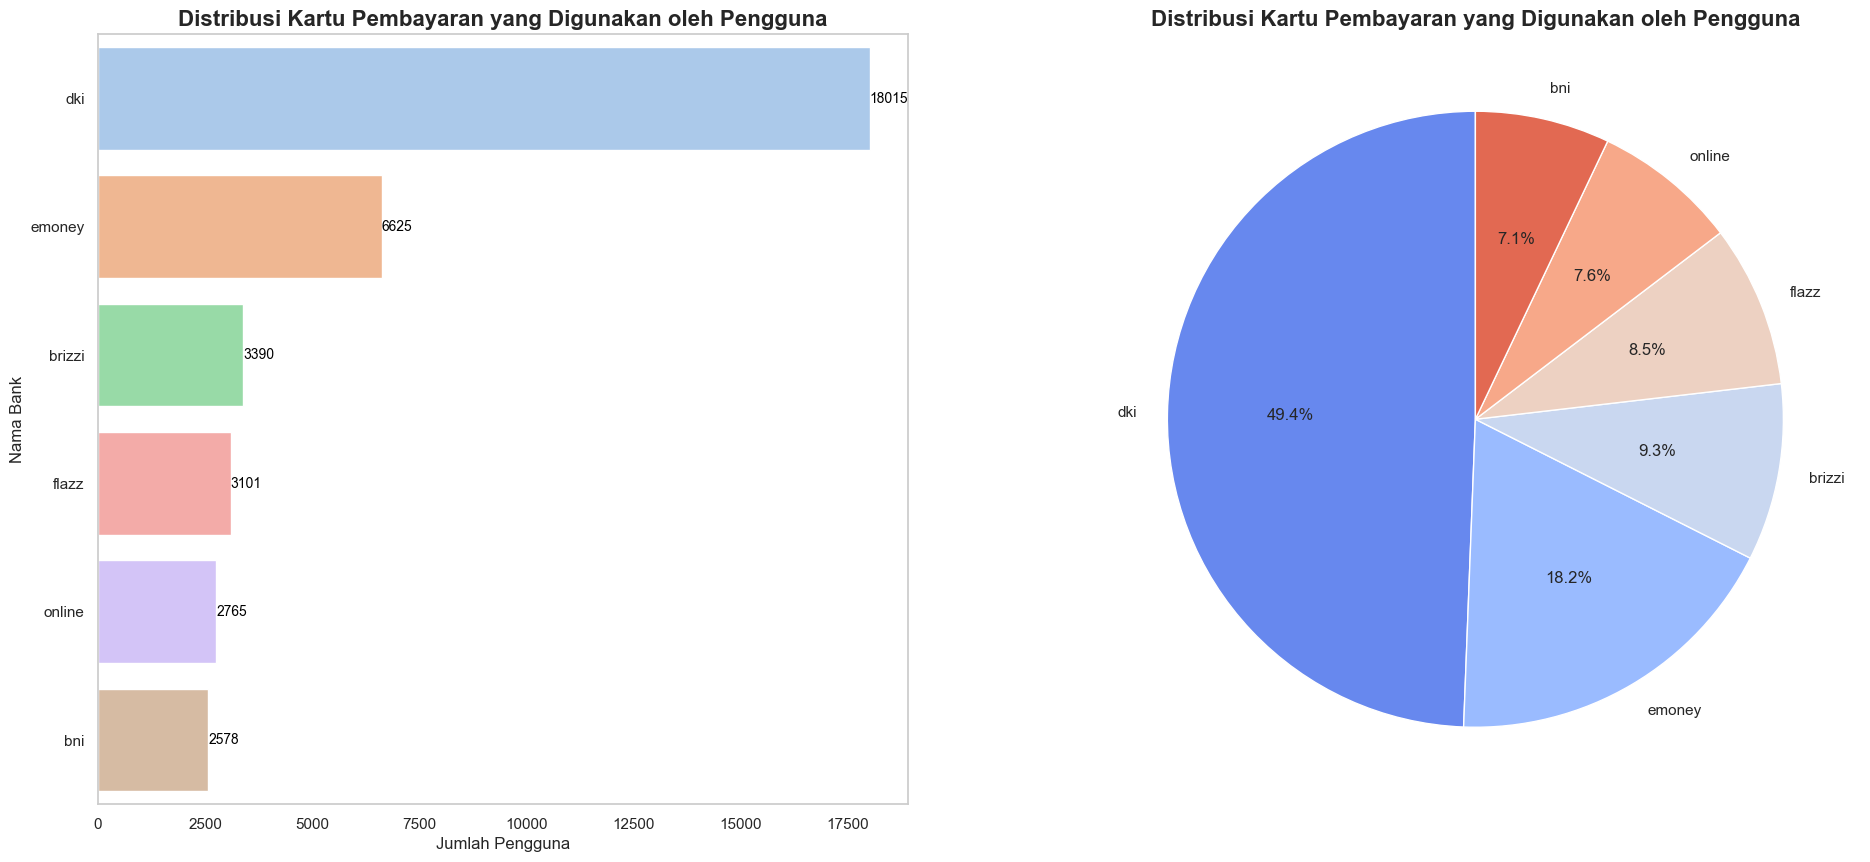

In [360]:
colors_countplot = sns.color_palette('pastel')
colors_piechart = sns.color_palette('coolwarm', len(jumlah_bank))

fig, axes = plt.subplots(1, 2, figsize=(23, 10))

sns.countplot(ax=axes[0], data=tj, y='payCardBank', order=tj['payCardBank'].value_counts().index, palette=colors_countplot)
axes[0].set_title('Distribusi Kartu Pembayaran yang Digunakan oleh Pengguna', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Jumlah Pengguna', fontsize=12)
axes[0].set_ylabel('Nama Bank', fontsize=12)

for index, value in enumerate(tj['payCardBank'].value_counts().values):
    axes[0].text(value, index, str(value), ha='left', va='center', fontsize=10, color='black')

explode = (0, 0, 0, 0, 0, 0)  
jumlah_bank.plot(ax=axes[1], kind='pie', autopct='%1.1f%%', startangle=90, colors=colors_piechart, explode=explode)

axes[1].set_title('Distribusi Kartu Pembayaran yang Digunakan oleh Pengguna', fontsize=16, fontweight='bold')
axes[1].set_ylabel('')

axes[1].set_aspect('equal')
axes[0].grid(False)

plt.show()

Dari dua grafik tersebut, dapat dilihat bahwa sebanyak 16,940 atau 49,4% dari total pengguna Transjakarta menggunakan kartu uang elektronik terbitan Bank DKI, menjadikannya yang paling dominan. Disusul oleh E-Money dari Bank Mandiri dengan jumlah 6,229 atau 18,2%, serta Brizzi dari Bank BRI sebanyak 3,195 atau 9,3%. Analisis ini memberikan wawasan lebih lanjut mengenai preferensi pengguna terhadap jenis kartu uang elektronik dalam menggunakan layanan Transjakarta. Terlebih lagi, informasi ini dapat menjadi dasar untuk potensi kerja sama lebih lanjut antara Transjakarta dan lembaga keuangan yang mengeluarkan kartu-kartu tersebut, dengan tujuan meningkatkan kemudahan akses dan pilihan pembayaran bagi pengguna transportasi umum di Jakarta.

In [361]:
Kategori_Kartu = pd.crosstab(tj['payCardBank'], tj['ageCategory'])
Kategori_Kartu

ageCategory,Anak-Anak,Dewasa,Lansia,Remaja
payCardBank,,,,
bni,190,2048,5,335
brizzi,41,2849,53,447
dki,686,14980,458,1891
emoney,247,5085,78,1215
flazz,143,2581,88,289
online,170,2284,52,259


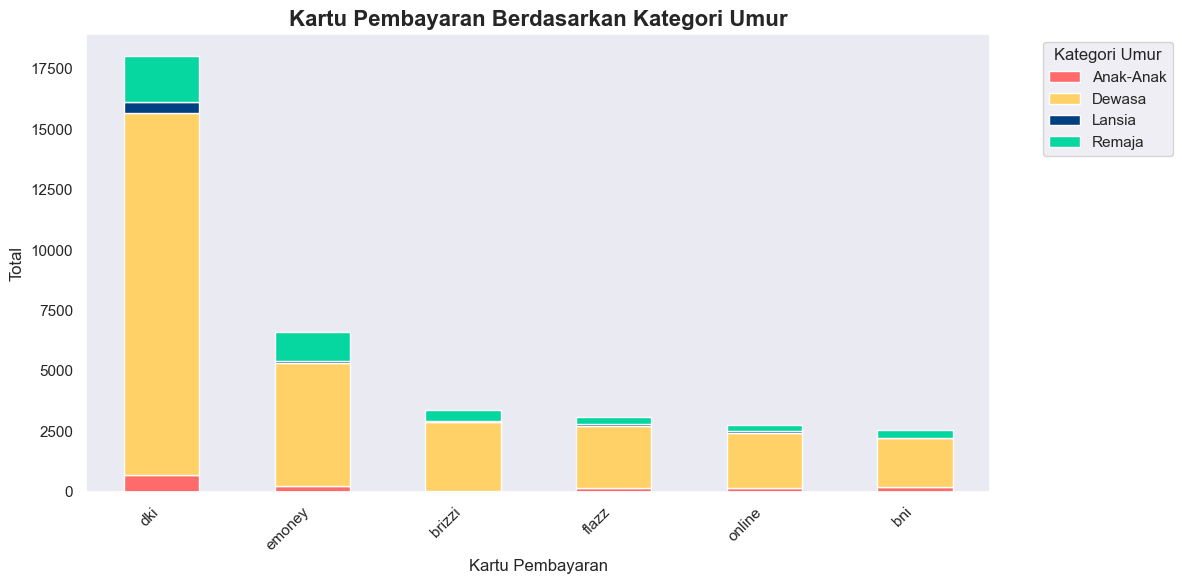

In [362]:
colors = ['#FF6B6B', '#FFD166', '#004080', '#06D6A0', '#118AB2']

sorted_index = Kategori_Kartu.sum(axis=1).sort_values(ascending=False).index
Kategori_Kartu_sorted = Kategori_Kartu.loc[sorted_index]

sns.set_theme()

ax = Kategori_Kartu_sorted.plot(kind='bar', stacked=True, color=colors, figsize=(12, 6))
plt.title('Kartu Pembayaran Berdasarkan Kategori Umur', fontsize=16, fontweight='bold')
plt.xlabel('Kartu Pembayaran', fontsize=12)
plt.ylabel('Total', fontsize=12)
plt.xticks(rotation=45, ha='right')
ax.grid(False)

plt.legend(title='Kategori Umur', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Grafik ini menggambarkan enam kartu pembayaran yang berbeda: bni, brizzi, dki, emoney, flazz, dan online. Setiap pembayaran memiliki empat kategori usia yang berbeda: Remaja, Dewasa, Anak-Anak, dan Lansia. "dki" memiliki jumlah tertinggi, terutama terdiri dari orang dewasa, diikuti oleh sebagian kecil lansia dan anak-anak. "brizzi" dan "emoney" memiliki distribusi yang lebih rendah dibandingkan "dki", dengan Dewasa menjadi mayoritas dalam kedua pembayaran tersebut. "Bni", "flazz", dan "online" memiliki jumlah yang jauh lebih rendah dengan orang dewasa sebagai pengguna utama.

Hal ini menunjukkan bahwa orang dewasa merupakan pengguna utama dari kartu pembayaran ini, dengan "dki" menjadi yang paling populer. Penggunaan Lansia relatif rendah di semua pembayaran, yang mungkin menunjukkan preferensi terhadap metode perbankan tradisional di kalangan lansia, atau mungkin juga kurangnya kenyamanan dengan opsi perbankan digital.

## 4. Pola Perjalanan Pengguna

In [363]:
grup_koridor = tj.groupby(['corridorID', 'corridorName']).size().reset_index(name='Count')
grup_koridor5 = grup_koridor.sort_values(by='Count', ascending=False).head(5)
grup_koridor5

,corridorID,corridorName,Count
40,1T,Cibubur - Balai Kota,389
216,S21,Ciputat - CSW,383
196,JIS3,Harmoni - Jakarta International Stadium,342
120,JAK.06,Kampung Rambutan - Pondok Gede,335
14,11P,Rusun Pondok Bambu - Walikota Jakarta Timur,333


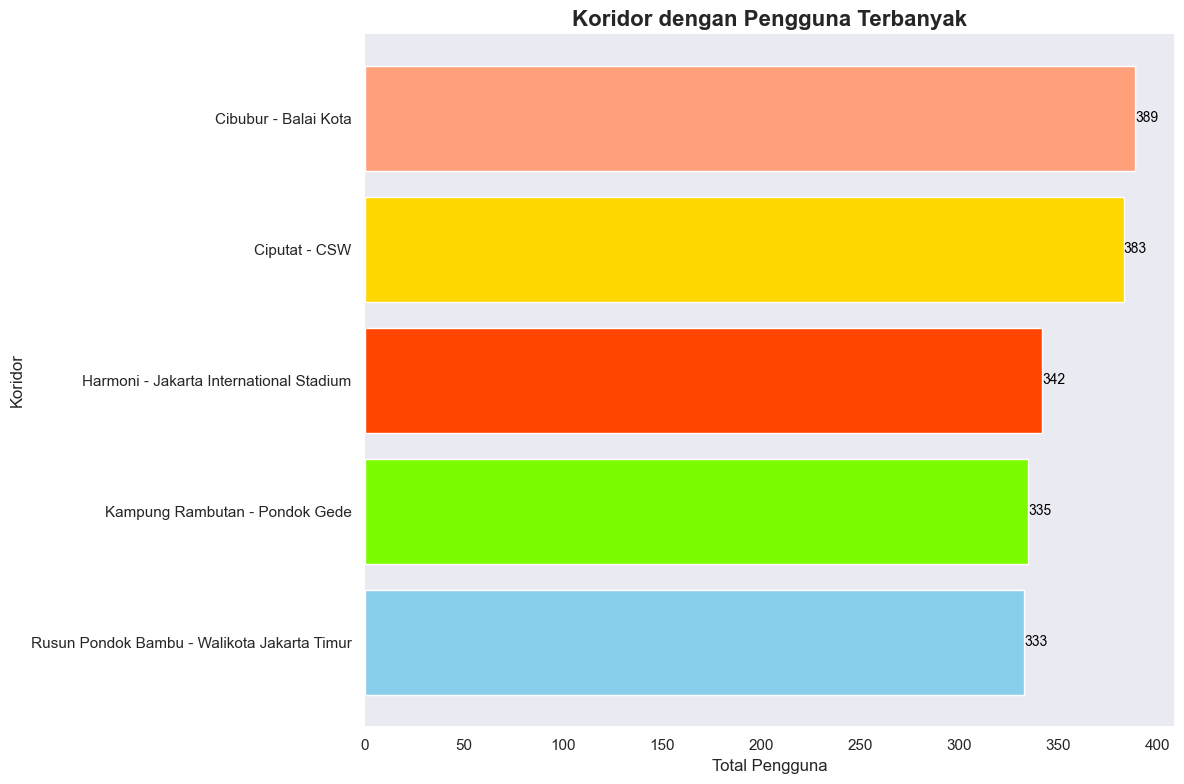

In [364]:
colors = ['#FFA07A', '#FFD700', '#FF4500', '#7CFC00', '#87CEEB']

plt.figure(figsize=(12, 8))
bars = plt.barh(grup_koridor5['corridorName'], grup_koridor5['Count'], color=colors)
plt.xlabel('Total Pengguna', fontsize=12)
plt.ylabel('Koridor', fontsize=12)
plt.title('Koridor dengan Pengguna Terbanyak', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(False)

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():,.0f}', 
             va='center', ha='left', fontsize=10, color='black')

for ax in plt.gcf().get_axes():
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

Berdasarkan diagram batang yang disajikan, terlihat bahwa koridor yang paling intensif digunakan adalah Koridor 1T dengan rute Cibubur-Balai Kota. Koridor ini melintasi sepanjang Jakarta Selatan dan Jakarta Pusat, dengan halte-halte yang menjadi akses utama ke kawasan perkantoran di Jakarta. Selain itu, koridor-koridor padat lainnya juga melibatkan wilayah sekitar Jakarta Pusat dan Selatan.

Untuk meningkatkan evaluasi efisiensi koridor dan armada secara menyeluruh, tanpa mempertimbangkan jam sibuk, PT. Transjakarta sebaiknya fokus pada pengembangan di wilayah ini. Penting untuk dicatat bahwa koridor ini tetap ramai digunakan di luar jam sibuk, menandakan kebutuhan transportasi yang tinggi di area tersebut.

In [365]:
jumlah_pengguna_tj = tj.groupby('tapInWeek').size()

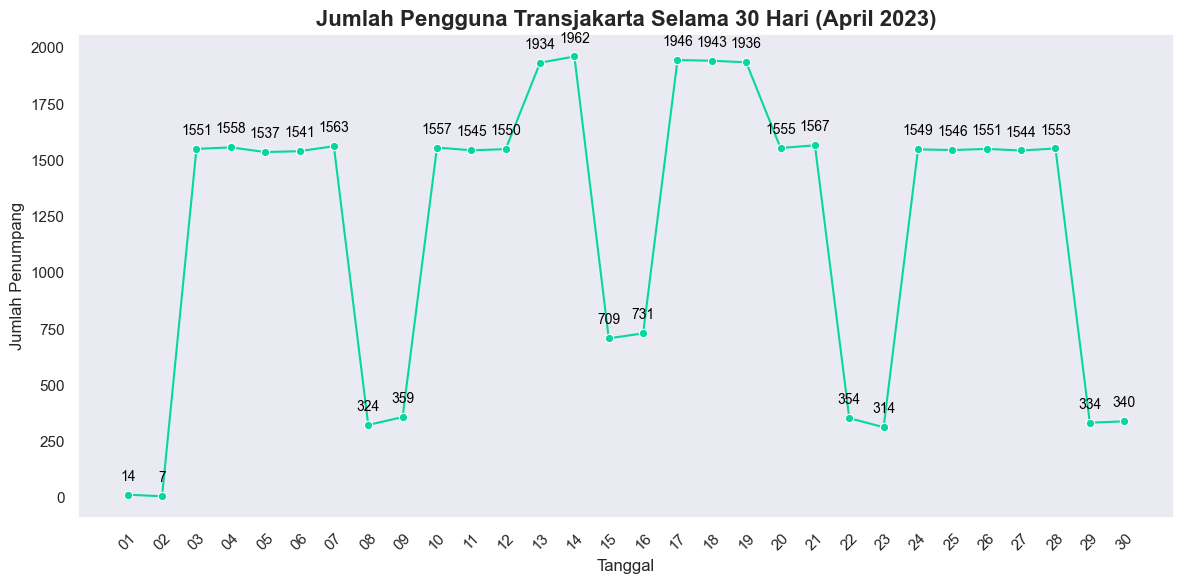

In [366]:
plt.figure(figsize=(12, 6))
plot = sns.lineplot(x=jumlah_pengguna_tj.index, y=jumlah_pengguna_tj.values, marker='o', color="#06D6A0")
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Jumlah Penumpang', fontsize=12)
plt.title('Jumlah Pengguna Transjakarta Selama 30 Hari (April 2023)', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)

for i, value in enumerate(jumlah_pengguna_tj.values):
    plt.annotate(f'{value}', (plot.get_lines()[0].get_xdata()[i], value), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, color='black')

plt.show()

Berdasarkan lineplot di atas, terlihat tren penggunaan Transjakarta per hari selama periode April 2023. Tren ini fluktuatif sesuai dengan pola hari kerja dan akhir pekan. Pada akhir pekan, terjadi penurunan signifikan dalam jumlah penumpang, bahkan saat libur Lebaran pada tanggal 22 dan 23 yang bertepatan dengan akhir pekan juga menunjukkan penurunan. Meskipun demikian, terdapat masih sejumlah penumpang yang tetap menggunakan Transjakarta, berkisar antara 400-700 penumpang per hari. Oleh karena itu, perlu diperhatikan optimalisasi armada pada akhir pekan dan waktu libur. Contohnya, dengan meratakan jam operasional armada dan mengalihkan armada bus wisata ke tempat-tempat rekreasi atau destinasi liburan lainnya yang dilalui oleh trayek Transjakarta. Analisis lebih lanjut perlu dilakukan untuk menentukan koridor mana yang paling ramai digunakan pada akhir pekan dan waktu libur.

## 5. Waktu Jam Sibuk Penggunaan TransJakarta

Sebelumnya, kita telah mengidentifikasi koridor yang paling sering digunakan tanpa mempertimbangkan waktu sibuk. Meskipun optimalisasi dan efisiensi koridor tersebut perlu diperhatikan, untuk mencapai hasil yang lebih tepat sasaran, aspek waktu sibuk juga harus dimasukkan dalam analisis data. Overcrowding seringkali menjadi permasalahan pada jam-jam sibuk di koridor yang padat. Oleh karena itu, penting untuk memahami kapan waktu sibuk penggunaan Transjakarta terjadi agar langkah-langkah optimalisasi dapat diarahkan dengan lebih akurat.

In [367]:
jam_sibuk= pd.crosstab(tj['tapInDay'], tj['tapInHour'])
jam_sibuk

tapInHour,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
tapInDay,,,,,,,,,,,,,,,,,
Jumat,619,1084,483,527,513,23,29,23,26,1,34,621,1002,413,441,428,378
Kamis,621,1070,485,512,503,20,27,21,26,3,37,598,986,451,406,409,399
Minggu,101,98,107,114,93,98,102,99,115,80,114,101,116,98,117,127,71
Rabu,592,1077,478,514,517,28,26,31,17,1,31,611,1017,429,435,389,381
Sabtu,110,91,91,116,103,88,91,109,99,79,116,111,138,106,109,103,75
Selasa,591,1092,525,494,496,16,26,28,20,2,28,593,1014,416,415,440,395
Senin,600,1107,524,502,489,14,26,16,35,1,26,600,1008,419,441,430,366


In [368]:
urutan_hari = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
jam_sibuk = jam_sibuk.reindex(urutan_hari)

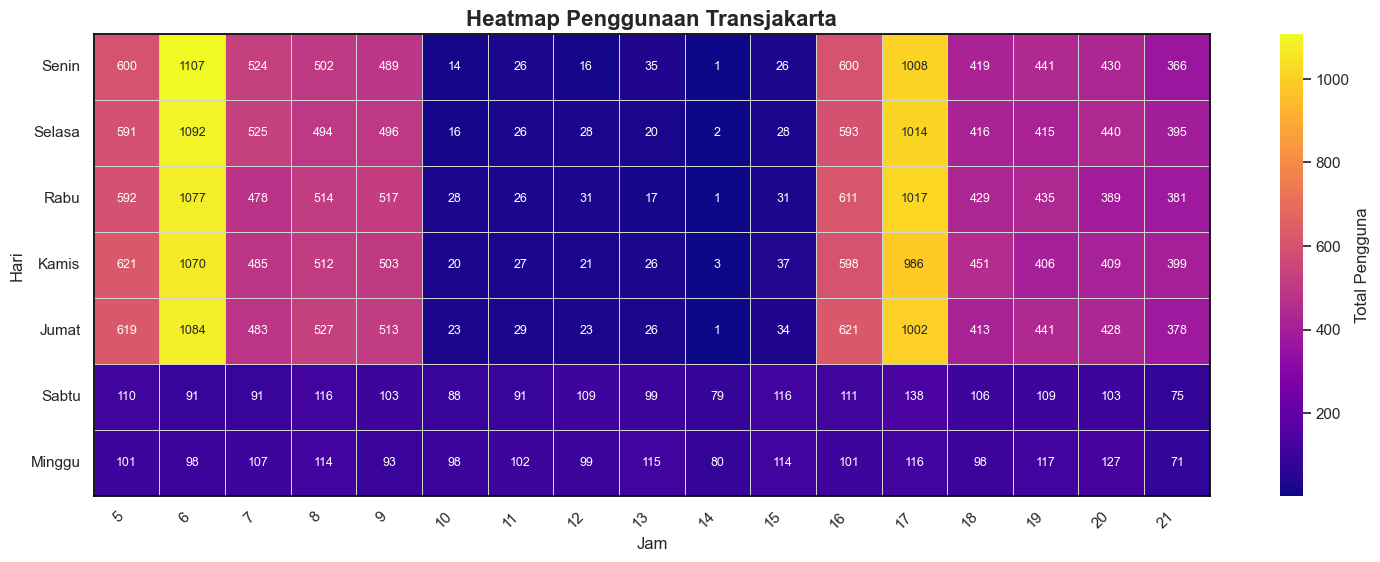

In [369]:
custom_colors = ["#FFD700", "#FFA500", "#FF8C00"]

sns.set_theme()

plt.figure(figsize=(18, 6))
sns.set_palette(custom_colors)

heatmap = sns.heatmap(jam_sibuk, annot=True, annot_kws={'size': 9}, fmt='.0f', cmap='plasma', linewidths=.5, linecolor='lightgrey', cbar_kws={'label': 'Total Pengguna'})

plt.title('Heatmap Penggunaan Transjakarta', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Hari', fontsize=12)

for _, spine in heatmap.spines.items():
    spine.set_visible(True)
    spine.set_edgecolor('black')

plt.show()

Berdasarkan heatmap yang disajikan, kita dapat mengkategorikan waktu sibuk penggunaan Transjakarta menjadi dua kategori utama. Pertama, Jam Sibuk Pagi Hari terjadi pada jam 5 pagi hingga 9 pagi, dengan puncaknya terjadi pada jam 6 pagi. Hal ini dipengaruhi oleh mobilitas pada saat berangkat kerja para pengguna Transjakarta. Sementara itu, Jam Sibuk Sore Hari terjadi pada jam 4 sore hingga 8 malam, dengan puncaknya pada jam 5 sore, yang terkait dengan mobilitas saat pulang kerja. Selain itu, terlihat bahwa penggunaan Transjakarta pada hari kerja jauh lebih padat dibandingkan pada akhir pekan. Poin menarik lainnya adalah puncak penggunaan Transjakarta pada hari Senin pada jam 6 pagi. 

Analisis waktu jam sibuk ini dapat dijadikan panduan untuk optimalisasi dan efisiensi kinerja trayek dan armada yang lebih relevan dengan pola mobilitas pengguna Transjakarta.

6. Pola Penggunaan TransJakarta di Waktu Jam Sibuk

Setelah mengetahui pola waktu sibuk penggunaan Transjakarta, langkah selanjutnya adalah melihat koridor dan halte yang paling sering diakses pada saat jam sibuk. Fokus disini tidak hanya pada koridor dengan tingkat penggunaan tertinggi, tetapi juga pada halte yang paling ramai, sehingga menjadi dasar evaluasi untuk optimalisasi armada dan penanganan masalah overcrowding di halte secara serentak. 

Overcrowding di beberapa halte, terutama pada koridor yang sering digunakan penumpang, masih merupakan tantangan yang dihadapi, disebabkan oleh kemacetan, gangguan jalur, dan jumlah armada yang kurang memadai. Oleh karena itu, evaluasi memperhatikan dua aspek utama, yaitu pertama, mengidentifikasi koridor terpadat pada jam sibuk untuk efisiensi armada melalui peralihan armada dari koridor yang kurang sibuk ke tempat yang padat. Kedua, revitalisasi halte yang memiliki potensi overcrowding tinggi, sehingga jika penumpang harus menunggu, mereka dapat melakukannya tanpa kepadatan dan tetap merasa nyaman.

In [370]:
def create_rush_time(cols):
    if 5 <= cols <= 9:
        return 'Morning Rush Hour'
    elif 16 <= cols <= 20:
        return 'Evening Rush Hour'
    else:
        return 'Non Rush Hour'

tj['rush_hour'] = tj['tapInHour'].apply(create_rush_time)

In [371]:
tj.head(1)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutTime,payAmount,tapInHour,tapOutHour,tapInDay,tapInWeek,transType,age,ageCategory,rush_hour
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,2023-04-03 06:00:53,3500.0,5,6,Senin,03,TransJakarta,15,Remaja,Morning Rush Hour


a. Koridor Berdasarkan Jam Sibuk Pagi Hari (5 -9 pagi)

In [372]:
jam_sibuk_pagi = tj[tj['rush_hour'] == "Morning Rush Hour"].groupby(['corridorID', 'corridorName']).size().reset_index(name='Count')
jam_sibuk_pagi = jam_sibuk_pagi.sort_values(by='Count', ascending=False).head(5)
jam_sibuk_pagi

,corridorID,corridorName,Count
40,1T,Cibubur - Balai Kota,193
216,S21,Ciputat - CSW,186
120,JAK.06,Kampung Rambutan - Pondok Gede,164
14,11P,Rusun Pondok Bambu - Walikota Jakarta Timur,163
196,JIS3,Harmoni - Jakarta International Stadium,162


b. Koridor Berdasarkan Jam Sibuk Sore Hari (4 sore - 8 malam)

In [373]:
jam_sibuk_sore = tj[tj['rush_hour'] == "Evening Rush Hour"].groupby(['corridorID', 'corridorName']).size().reset_index(name='Count')
jam_sibuk_sore = jam_sibuk_sore.sort_values(by='Count', ascending=False).head(5)
jam_sibuk_sore

,corridorID,corridorName,Count
40,1T,Cibubur - Balai Kota,167
196,JIS3,Harmoni - Jakarta International Stadium,150
93,8C,Kebayoran Lama - Tanah Abang,147
120,JAK.06,Kampung Rambutan - Pondok Gede,143
216,S21,Ciputat - CSW,143


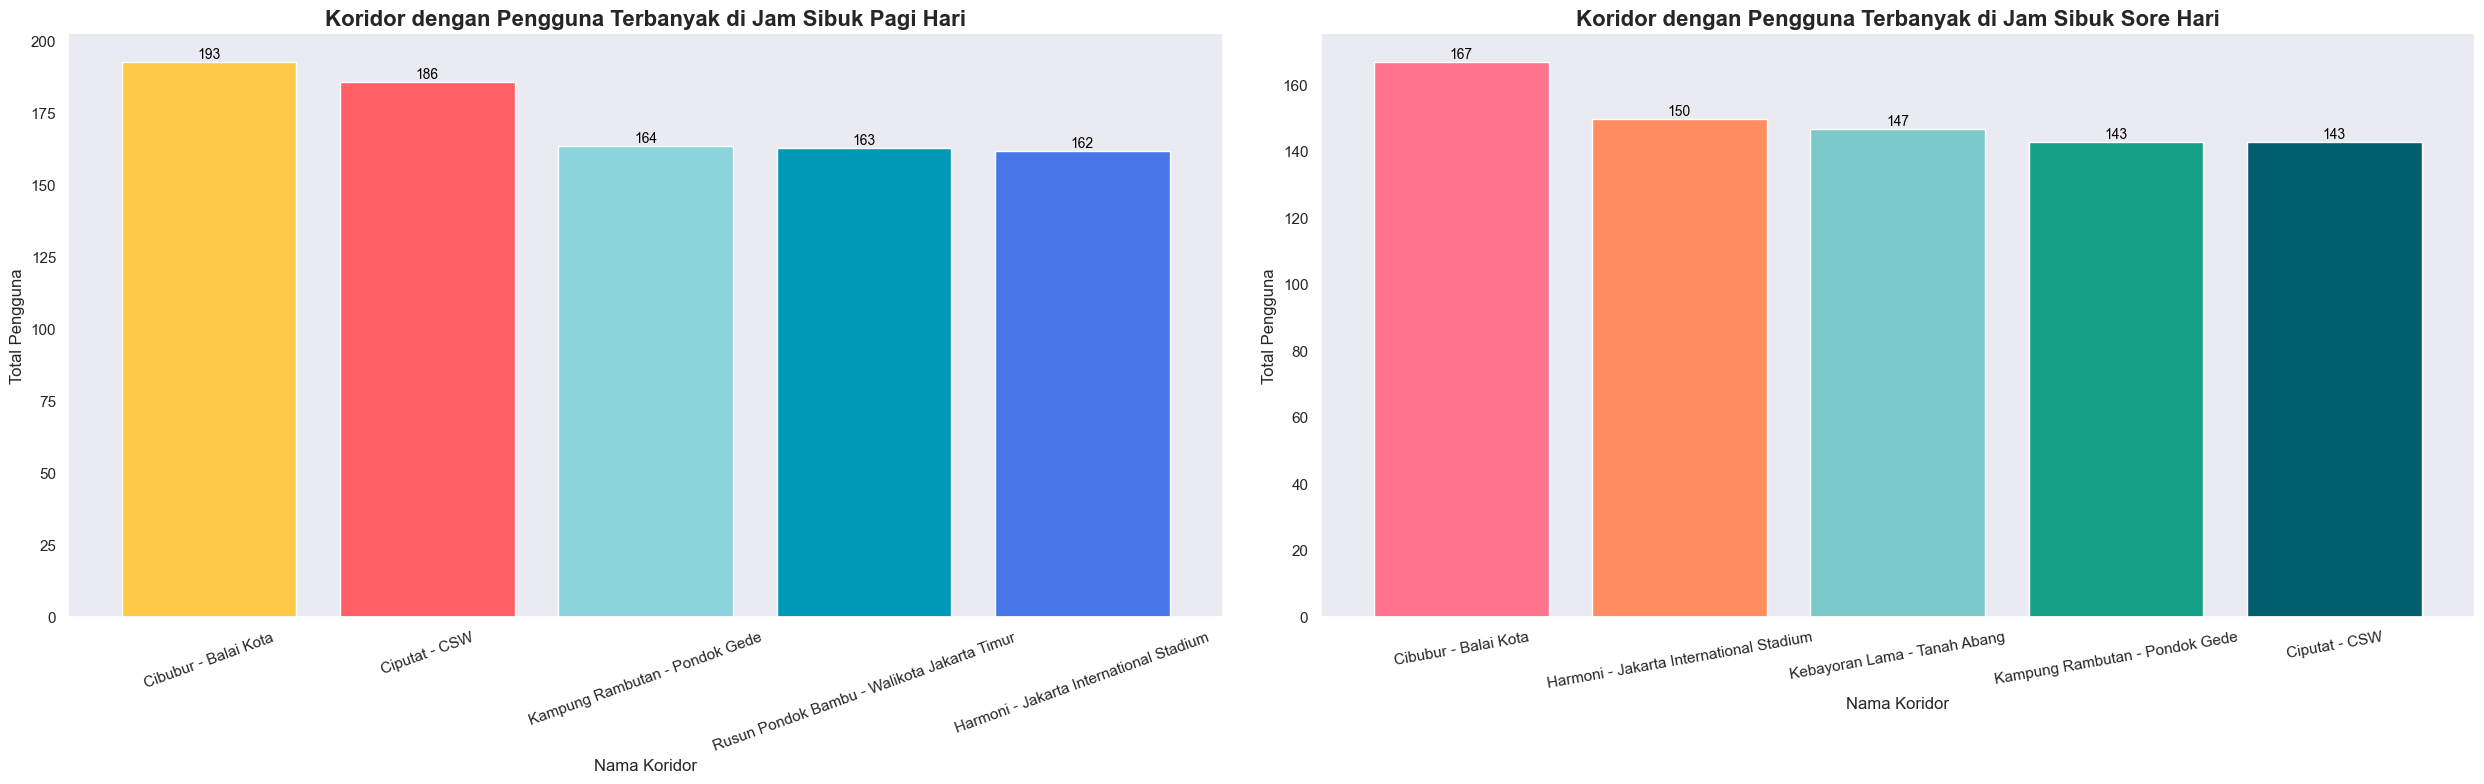

In [374]:
custom_colors = ["#FFC947", "#FF5F65", "#8BD3DD", "#0099B5", "#4776E6", "#B4C5E4"]
custom_colors1 = ["#FF748C", "#FF8D5F", "#7BC9C9", "#16A085", "#005D6E", "#6A0572"]

sns.set_theme()

fig, axes = plt.subplots(1, 2, figsize=(25, 8))

bars1 = axes[0].bar(jam_sibuk_pagi['corridorName'], jam_sibuk_pagi['Count'], color=custom_colors)
axes[0].set_title('Koridor dengan Pengguna Terbanyak di Jam Sibuk Pagi Hari', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Nama Koridor', fontsize=12)
axes[0].set_ylabel('Total Pengguna', fontsize=12)
axes[0].tick_params(axis='x', rotation=20)
axes[0].grid(False)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['left'].set_visible(False)

for bar in bars1:
    axes[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():,.0f}', 
                 ha='center', va='bottom', fontsize=10, color='black')

bars2 = axes[1].bar(jam_sibuk_sore['corridorName'], jam_sibuk_sore['Count'], color=custom_colors1)
axes[1].set_title('Koridor dengan Pengguna Terbanyak di Jam Sibuk Sore Hari', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Nama Koridor', fontsize=12)
axes[1].set_ylabel('Total Pengguna', fontsize=12)
axes[1].tick_params(axis='x', rotation=10)
axes[1].grid(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['left'].set_visible(False)

for bar in bars2:
    axes[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():,.0f}', 
                 ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

Berdasarkan barchart yang disajikan, kita dapat mengidentifikasi koridor-koridor yang paling padat penumpang selama jam operasi tersibuk. Pola perjalanan menunjukkan bahwa koridor Cibubur-Balaikota tetap mendominasi penggunaan pada waktu sibuk pagi maupun sore, yang sesuai dengan pola sebelumnya. Penyebabnya masih sama, karena koridor ini melintasi wilayah perkantoran yang sibuk di Jakarta. Barchart di sebelah kiri memberikan informasi koridor yang banyak digunakan pada waktu sibuk pagi, sedangkan di sebelah kanan memberikan informasi koridor yang sering dipakai pada waktu sibuk sore.

Transjakarta dapat mengambil langkah strategis, seperti mengalihkan atau menambah armada sesuai dengan kebutuhan, kapasitas, dan waktu sibuk pada halte-halte yang teridentifikasi. Hasil analisis data pola perjalanan ini juga dapat menjadi dasar evaluasi terkait kapasitas armada, dengan mempertimbangkan informasi jumlah armada yang dimiliki dan dioperasikan oleh Transjakarta.

Meskipun demikian, dari hasil barchart tersebut, dapat disimpulkan bahwa koridor-koridor yang tercatat perlu menjadi perhatian khusus terkait dengan optimalisasi dan efisiensi armada Transjakarta.

c. Halte Tap In Berdasarkan Jam Sibuk Pagi Hari

In [375]:
jam_sibuk_pagi_tapIn = tj[tj['rush_hour'] == "Morning Rush Hour"].groupby(['tapInStops', 'tapInStopsName']).size().reset_index(name='Count')
jam_sibuk_pagi_tapIn = jam_sibuk_pagi_tapIn.sort_values(by='Count', ascending=False).head(5)
jam_sibuk_pagi_tapIn

,tapInStops,tapInStopsName,Count
1152,P00064,Garuda Taman Mini,139
593,B03277P,Rusun Kapuk Muara,98
1228,P00170,Penjaringan,88
1291,P00254,Tendean,81
1252,P00202,Rawa Selatan,80


d. Halte Tap In Berdasarkan Jam Sibuk Sore Hari

In [376]:
jam_sibuk_sore_tapIn = tj[tj['rush_hour'] == "Evening Rush Hour"].groupby(['tapInStops', 'tapInStopsName']).size().reset_index(name='Count')
jam_sibuk_sore_tapIn = jam_sibuk_sore_tapIn.sort_values(by='Count', ascending=False).head(5)
jam_sibuk_sore_tapIn

,tapInStops,tapInStopsName,Count
1206,P00170,Penjaringan,128
63,B00248P,Cibubur Junction,100
1090,P00016,BKN,88
1288,P00297,BNN LRT,82
1201,P00164,Pejaten,79


e. Halte Tap Out Berdasarkan Jam Sibuk Pagi Hari

In [377]:
jam_sibuk_pagi_tapOut= tj[tj['rush_hour'] == "Morning Rush Hour"].groupby(['tapOutStops', 'tapOutStopsName']).size().reset_index(name='Count')
jam_sibuk_pagi_tapOut= jam_sibuk_pagi_tapOut.sort_values(by='Count', ascending=False).head(5)
jam_sibuk_pagi_tapOut

,tapOutStops,tapOutStopsName,Count
1108,P00170,Penjaringan,166
1004,P00016,BKN,159
1083,P00137,Monas,140
1070,P00112,Kejaksaan Agung,102
38,B00221P,Bundaran Senayan 1,98


f. Halte Tap Out Berdasarkan Jam Sibuk Sore Hari

In [378]:
jam_sibuk_sore_tapOut = tj[tj['rush_hour'] == "Evening Rush Hour"].groupby(['tapOutStops', 'tapOutStopsName']).size().reset_index(name='Count')
jam_sibuk_sore_tapOut = jam_sibuk_sore_tapOut.sort_values(by='Count', ascending=False).head(5)
jam_sibuk_sore_tapOut

,tapOutStops,tapOutStopsName,Count
1010,P00016,BKN,134
844,B05725P,Term. Senen,120
1122,P00179,Pinang Ranti,97
835,B05708P,Term. Kampung Rambutan,89
515,B03277P,Rusun Kapuk Muara,87


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10884\4204318291.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='Count', y='tapInStopsName', data=jam_sibuk_pagi_tapIn.head(5), palette='Blues', linewidth=0, edgecolor='none', ax=axes[0, 0])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10884\4204318291.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='Count', y='tapInStopsName', data=jam_sibuk_sore_tapIn.head(5), palette='Oranges', linewidth=0, edgecolor='none', ax=axes[0, 1])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10884\4204318291.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable

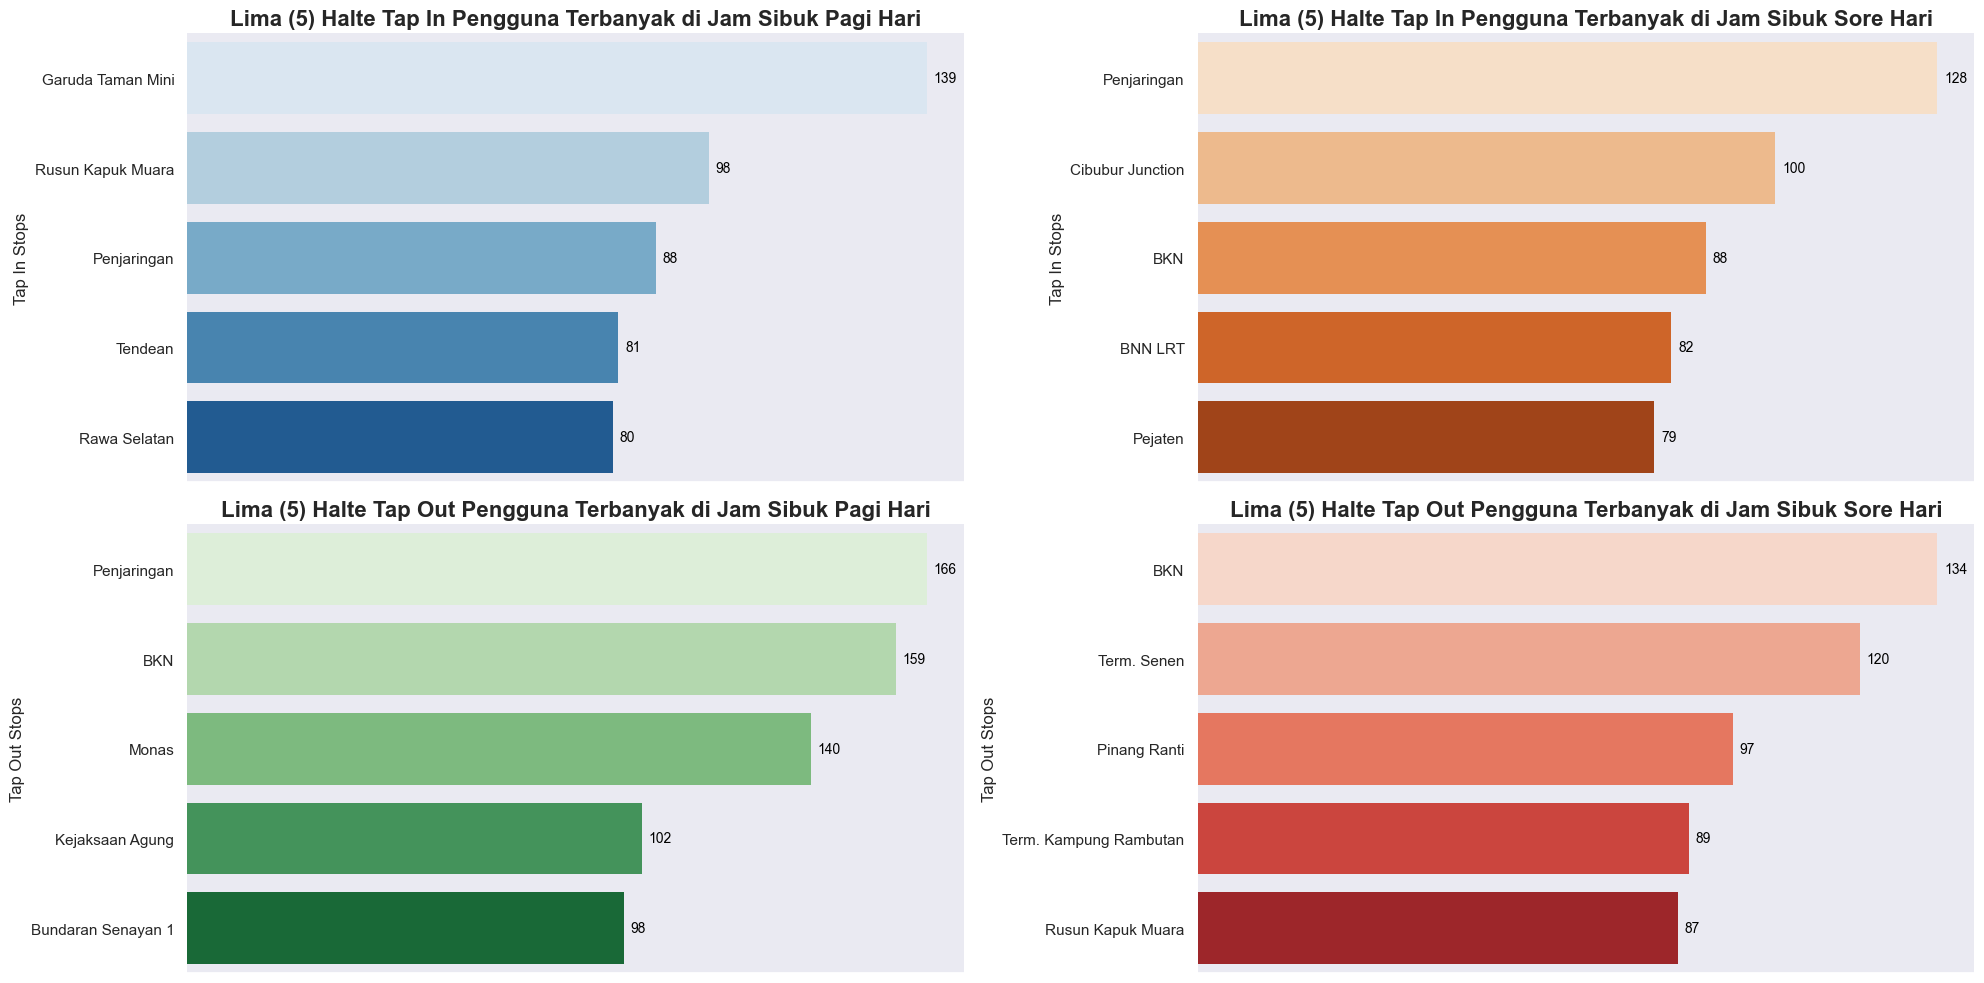

In [379]:
sns.set_theme()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

ax1 = sns.barplot(x='Count', y='tapInStopsName', data=jam_sibuk_pagi_tapIn.head(5), palette='Blues', linewidth=0, edgecolor='none', ax=axes[0, 0])
ax1.set_title('Lima (5) Halte Tap In Pengguna Terbanyak di Jam Sibuk Pagi Hari', fontsize=16, fontweight='bold')
ax1.set_xlabel('')
ax1.set_ylabel('Tap In Stops', fontsize=12)
ax1.set_xticks([]) 
ax1.grid(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
for p in ax1.patches:
    ax1.annotate(f'{p.get_width():,.0f}', (p.get_x() + p.get_width(), p.get_y() + p.get_height()/2),
                 xytext=(5, 0), textcoords='offset points',
                 ha='left', va='center', fontsize=10, color='black')

ax2 = sns.barplot(x='Count', y='tapInStopsName', data=jam_sibuk_sore_tapIn.head(5), palette='Oranges', linewidth=0, edgecolor='none', ax=axes[0, 1])
ax2.set_title('Lima (5) Halte Tap In Pengguna Terbanyak di Jam Sibuk Sore Hari', fontsize=16, fontweight='bold')
ax2.set_ylabel('Tap In Stops', fontsize=12)
ax2.set_xlabel('')
ax2.set_xticks([]) 
ax2.grid(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
for p in ax2.patches:
    ax2.annotate(f'{p.get_width():,.0f}', (p.get_x() + p.get_width(), p.get_y() + p.get_height()/2),
                 xytext=(5, 0), textcoords='offset points',
                 ha='left', va='center', fontsize=10, color='black')

ax3 = sns.barplot(x='Count', y='tapOutStopsName', data=jam_sibuk_pagi_tapOut.head(5), palette='Greens', linewidth=0, edgecolor='none', ax=axes[1, 0])
ax3.set_title('Lima (5) Halte Tap Out Pengguna Terbanyak di Jam Sibuk Pagi Hari', fontsize=16, fontweight='bold')
ax3.set_xlabel('')
ax3.set_ylabel('Tap Out Stops', fontsize=12)
ax3.set_xticks([])
ax3.grid(False)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
for p in ax3.patches:
    ax3.annotate(f'{p.get_width():,.0f}', (p.get_x() + p.get_width(), p.get_y() + p.get_height()/2),
                 xytext=(5, 0), textcoords='offset points',
                 ha='left', va='center', fontsize=10, color='black')


ax4 = sns.barplot(x='Count', y='tapOutStopsName', data=jam_sibuk_sore_tapOut.head(5), palette='Reds', linewidth=0, edgecolor='none', ax=axes[1, 1])
ax4.set_title('Lima (5) Halte Tap Out Pengguna Terbanyak di Jam Sibuk Sore Hari', fontsize=16, fontweight='bold')
ax4.set_xlabel('')
ax4.set_ylabel('Tap Out Stops', fontsize=12)
ax4.set_xticks([])
ax4.grid(False)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['left'].set_visible(False)
for p in ax4.patches:
    ax4.annotate(f'{p.get_width():,.0f}', (p.get_x() + p.get_width(), p.get_y() + p.get_height()/2),
                 xytext=(5, 0), textcoords='offset points',
                 ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

Melakukan identifikasi terhadap halte yang paling sering digunakan pada jam sibuk menjadi langkah penting guna memberikan data pendukung bagi PT. Transjakarta dalam mengatasi permasalahan overcrowding di halte yang ramai pada waktu sibuk. Dengan mengetahui halte yang padat, rencana revitalisasi Transjakarta dapat disusun dengan lebih tepat sasaran.

Dengan merujuk pada data periode April 2023 dan barchart yang disajikan, terlihat dengan jelas halte-halte yang memerlukan fokus untuk optimalisasi fasilitas. Meskipun beberapa halte sudah mengalami revitalisasi, prioritas optimalisasi fasilitas halte sebaiknya difokuskan pada lokasi Garuda Taman Mini, Rusun Muara Kapuk, Penjaringan, Rawa Selatan, dan Cibubur Junction.

Pada Jam Sibuk Pagi Hari, Garuda Taman Mini menjadi halte tap-in paling banyak digunakan, menunjukkan bahwa sejumlah besar penumpang memulai perjalanan mereka dari halte ini. Sementara itu, Penjaringan menjadi halte tap-out yang paling sering digunakan, mengindikasikan bahwa banyak penumpang mengakhiri perjalanan pagi mereka di sini.

Pada Jam Sibuk Sore Hari, Penjaringan menjadi halte tap-in paling banyak digunakan, menunjukkan bahwa banyak penumpang memulai perjalanan pulang mereka dari sini. Sementara itu, BKN menjadi tap-out yang paling sering digunakan, menandakan bahwa banyak penumpang mengakhiri harinya di halte tersebut.

Pola-pola ini mungkin terjadi karena lokasi halte-halte ini terkait dengan area hunian dan komersial. Sebagai contoh, jika Penjaringan berlokasi dekat dengan distrik bisnis, hal ini dapat menjelaskan mengapa halte tersebut menjadi halte tap-out umum pada pagi hari (ketika orang pergi bekerja) dan halte tap-in umum pada malam hari (ketika orang pulang ke rumah). Beberapa halte seperti BKN dan Rusun Kapuk Muara muncul dalam data pagi dan sore hari, menunjukkan bahwa halte-halte ini penting sepanjang hari.

## 7. Pola Penggunaan TransJakarta di Akhir Pekan dan Libur Lebaran

Periode April 2023 mencakup beberapa hari libur, termasuk hari libur Lebaran dan cuti bersama. Oleh karena itu, penting untuk mengevaluasi pola penggunaan Transjakarta selama periode ini sebagai salah satu elemen penting dalam merancang optimalisasi armada untuk masa libur yang akan datang.

a. Penggunaan TransJakarta di Akhir Pekan

In [380]:
akhirpekan_df = tj[tj['tapInDay'].isin(['Sabtu', 'Minggu'])]

In [381]:
jam_sibuk_akhirpekan = pd.crosstab(akhirpekan_df['tapInDay'], akhirpekan_df['tapInHour'])
jam_sibuk_akhirpekan

tapInHour,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
tapInDay,,,,,,,,,,,,,,,,,
Minggu,101,98,107,114,93,98,102,99,115,80,114,101,116,98,117,127,71
Sabtu,110,91,91,116,103,88,91,109,99,79,116,111,138,106,109,103,75


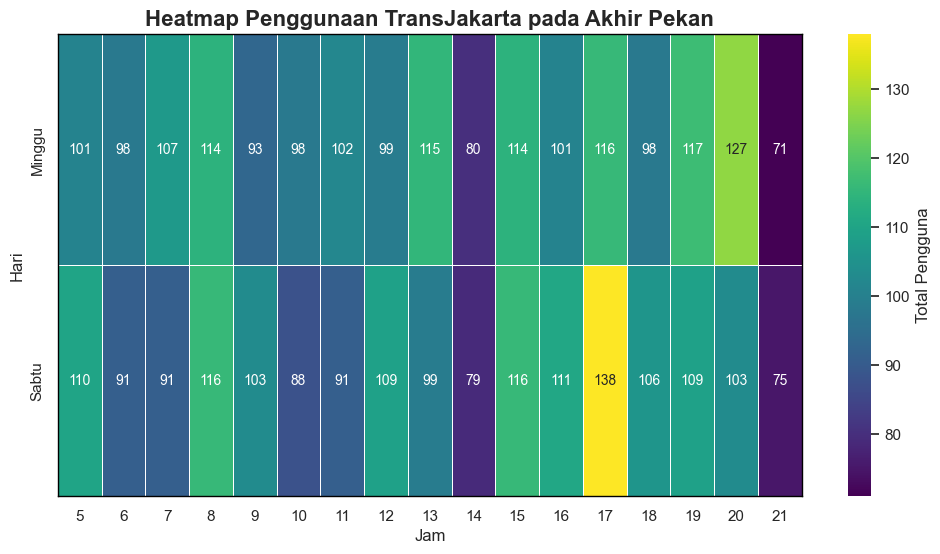

In [382]:
sns.set(style="whitegrid")


plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(jam_sibuk_akhirpekan, annot=True, 
                      annot_kws={'size': 10}, fmt='.0f',
                      cmap='viridis', linewidths=.5,  cbar_kws={'label': 'Total Pengguna'})
plt.title('Heatmap Penggunaan TransJakarta pada Akhir Pekan', fontsize=16, fontweight='bold')
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Hari', fontsize=12)


for _, spine in heatmap.spines.items():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1)


plt.show()

Berdasarkan heatmap penggunaan halte pada hari libur, terutama akhir pekan, terlihat bahwa antara jam 5 pagi hingga 9 malam menjadi periode sibuk dengan sebaran yang merata. Jam 2 siang hingga 9 malam menunjukkan waktu yang lebih sepi. Pola ini berlaku baik pada hari Sabtu maupun Minggu, mengindikasikan bahwa optimalisasi armada pada akhir pekan dapat dilakukan secara merata tanpa fokus pada waktu tertentu. 

Pada akhir pekan menunjukkan, puncak penggunaan TransJakarta terjadi pada jam 17:00 pada hari Sabtu, menandakan waktu yang paling sibuk selama akhir pekan. Pada siang dan malam hari adalah waktu tersibuk untuk penggunaan transportasi TransJakarta selama akhir pekan, dengan puncak terjadi pada malam Sabtu. Hal ini dapat disebabkan oleh berbagai faktor seperti orang bepergian untuk kegiatan rekreasi atau pulang dari tempat kerja.

In [383]:
Koridor_AkhirPekan = tj[(tj['tapInDay'] == "Sabtu") | (tj['tapInDay'] == "Minggu")].groupby(['corridorID', 'corridorName']).size().reset_index(name='Count')
Koridor_AkhirPekan_Urut = Koridor_AkhirPekan.sort_values(by='Count', ascending=False).head(5)
Koridor_AkhirPekan_Urut

,corridorID,corridorName,Count
140,JAK.19,Pinang Ranti - Kampung Rambutan,33
133,JAK.120,JIS - Terminal Muara Angke,32
100,9C,Pinang Ranti - Bundaran Senayan,31
43,2B,Harapan Indah - ASMI,30
13,11N,Rusun Cipinang Muara - Jatinegara,28


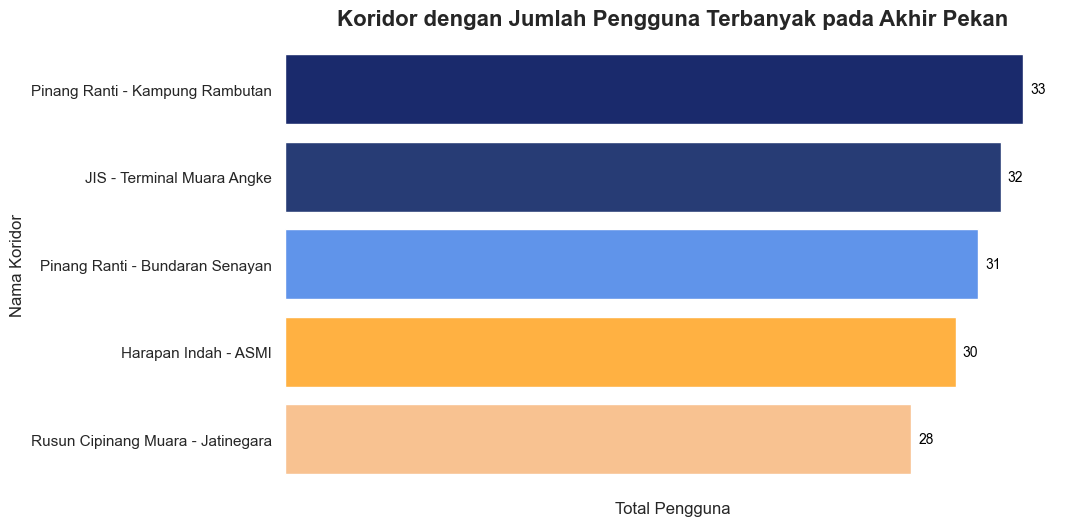

In [384]:
colors = ['#1a2a6c', '#273c75', '#6094ea', '#ffb142', '#f8c291']

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
bars = plt.barh(Koridor_AkhirPekan_Urut['corridorName'], Koridor_AkhirPekan_Urut['Count'], color=colors)
plt.xlabel('Total Pengguna', fontsize=12)
plt.xticks([])
plt.ylabel('Nama Koridor', fontsize=12)
plt.title('Koridor dengan Jumlah Pengguna Terbanyak pada Akhir Pekan', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(False)
plt.box(False)

for bar in bars:
    plt.annotate(f'{bar.get_width():,.0f}', 
                 xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                 xytext=(5, 0),  # Jarak dari bar
                 textcoords='offset points',
                 ha='left', va='center', fontsize=10, color='black')

plt.show()

Dari barchart yang disajikan, terlihat bahwa koridor-koridor yang paling sering digunakan di akhir pekan melibatkan koridor Pinang Ranti - Kampung Rambutan, JIS - Terminal Muara Angke, Pinang Ranti - Bunderan Senayan, dan lain-lain. Pemahaman lebih lanjut terungkap bahwa koridor-koridor ini melewati tempat wisata populer seperti TMII (Taman Mini), pusat kota, pusat perbelanjaan, dan destinasi wisata lainnya yang sering dikunjungi pada akhir pekan. 


b. Penggunaan TransJakarta di Libur Lebaran

In [385]:
Koridor_Lebaran = tj[(tj['tapInWeek'] == "22") | (tj['tapInWeek'] == "23")].groupby(['corridorID', 'corridorName']).size().reset_index(name='Count')
Koridor_Lebaran_Urut = Koridor_Lebaran.sort_values(by='Count', ascending=False).head(10)
Koridor_Lebaran_Urut

,corridorID,corridorName,Count
111,JAK.02,Kampung Melayu - Duren Sawit,10
79,7A,Kampung Rambutan - Lebak Bulus,8
121,JAK.110A,Rusun Marunda - Terminal Terpadu Pulo Gebang,8
60,5B,Stasiun Tebet - BNN,7
8,11D,Pulo Gebang - Pulo Gadung 2 via PIK,7
108,D21,Universitas Indonesia - Lebak Bulus,6
47,3A,Rusun Pesakih - Kalideres,6
4,10K,Tanjung Priok - Senen via Taman BMW,6
91,8E,Bintaro - Blok M,6
152,JAK.38,Bulak Ringin - Kampung Rambutan,6


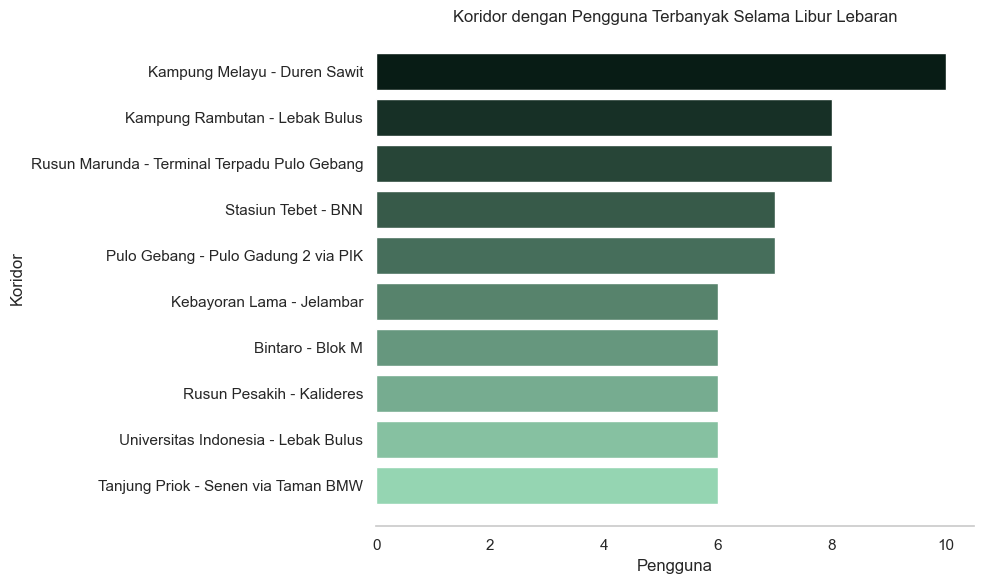

In [386]:
plt.figure(figsize=(10, 6))

Koridor_Lebaran_Urut = Koridor_Lebaran.sort_values(by='Count', ascending=True).tail(10)
cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', ['#95d5b2','#081c15'])

num_bars = len(Koridor_Lebaran_Urut)
values = np.linspace(0, 1, num_bars)

bars = plt.barh(Koridor_Lebaran_Urut['corridorName'], Koridor_Lebaran_Urut['Count'], color=cmap(values))

plt.xlabel('Pengguna')
plt.ylabel('Koridor')
plt.title('Koridor dengan Pengguna Terbanyak Selama Libur Lebaran')
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.tight_layout()
plt.show()


Dengan melihat barchart di atas, terlihat bahwa koridor-koridor tersebut menghubungkan wilayah terminal seperti Kampung Melayu, Kampung Rambutan, Terminal Pulo-Gadung, Stasiun Tebet, Pulo Gebang, Kebayoran Lama, Lebak Bulus, dan Tanjung Priok. Hal ini mungkin terjadi karena banyak orang memilih Transjakarta sebagai sarana transportasi untuk mencapai terminal bus, terutama pada waktu libur Lebaran. 

Pada dasarnya, pola perjalanan ini mencerminkan kecenderungan masyarakat untuk bepergian keluar wilayah Jakarta menggunakan transportasi yang dapat diakses dari terminal. Dengan memperhatikan pola perjalanan ini, perlu dilakukan evaluasi ulang terhadap operasionalitas koridor ini untuk memastikan bahwa pada masa libur Lebaran tahun berikutnya, semua koridor dapat diakses secara optimal.

## 8. Pola Penggunaan TransJakarta Menggunakan Folium

In [387]:
from IPython.display import display
import folium
from folium.plugins import HeatMap

coords = tj[['tapInStopsLat', 'tapInStopsLon']].dropna()

folium1 = folium.Map(
    location=[tj["tapInStopsLat"].max(), tj["tapInStopsLon"].min()],
    tiles="OpenStreetMap",  # Use OpenStreetMap tiles
    zoom_start=11
)

HeatMap(data=coords, radius=16, min_opacity=0.1).add_to(folium1)

display(folium1)

In [388]:
from IPython.display import display
import folium
from folium.plugins import HeatMap

coords = tj[['tapOutStopsLat', 'tapOutStopsLon']].dropna()

folium2 = folium.Map(
    location=[tj["tapOutStopsLat"].max(), tj["tapOutStopsLon"].min()],
    tiles="OpenStreetMap",  # Use OpenStreetMap tiles
    zoom_start=11
)

HeatMap(data=coords, radius=16, min_opacity=0.1).add_to(folium2)

display(folium2)

Berdasarkan kedua peta folium di atas, dapat diperhatikan bahwa pusat aktivitas penggunaan Transjakarta, atau "heat location," terpusat di daerah Jakarta Pusat dan Jakarta Selatan. Namun, terdapat sedikit pergeseran wilayah antara lokasi "Tap In" dan "Tap Out." Pada peta pertama, "heat location" tampak lebih merata di sekitar Jakarta Timur, Pusat, Selatan, dan Utara, menunjukkan bahwa banyak penumpang memulai perjalanan dari titik awal (Tap In) di daerah-daerah tersebut. Sebaliknya, pada peta kedua (Tap Out), "heat location" lebih terfokus ke pusat Jakarta Pusat dan Selatan, menandakan bahwa banyak pengguna Transjakarta menuju ke wilayah tersebut.

Dengan demikian, dapat disimpulkan bahwa titik lokasi Transjakarta yang paling sering digunakan terletak di wilayah Jakarta Selatan dan Pusat. Kecenderungan ini mengingat Jakarta Pusat dan Selatan merupakan pusat kegiatan perkantoran dan area yang padat aktivitas. Pengguna Transjakarta, yang dominan oleh orang dewasa yang bekerja, kemungkinan besar menggunakan layanan ini sebagai sarana transportasi untuk keperluan pekerjaan mereka.

Menyimpan Data dalam bentuk Excel

In [389]:
tj.to_excel('Transjakarta_Viz.xlsx', index=False)

# **Kesimpulan**

Kesimpulan dari analisis data evaluasi bulanan untuk optimalisasi kinerja armada dan operasional trayek/halte perjalanan Transjakarta adalah sebagai berikut:

1. Penggunaan moda TransJakarta di Jakarta cenderung didominasi oleh Transjakarta diikuti oleh Jak Lingko. Hal ini menunjukkan bahwa preferensi masyarakat Jakarta cenderung tertuju pada transportasi umum dengan harga ekonomis dan efektif

2. Pengguna Transjakarta mayoritas menggunakan kartu uang elektronik terbitan Bank DKI sebagai pembayaran untuk menggunakan TransJakarta.

3. Proporsi pengguna wanita tidak menunjukkan perbedaan yang signifikan dengan pengguna pria. Namun, perlu diperhatikan kembali urgensi armada khusus wanita di wilayah tertentu sesuai kebijakan inklusif armada tersebut. Mayoritas pengguna Transjakarta berada dalam kategori usia dewasa dan remaja. Adapun, penyesuaian perlu dilakukan untuk memenuhi kebutuhan kelompok lansia sebagai upaya Transjakarta dalam menyediakan sarana transportasi yang ramah dan nyaman.

4. Heat location atau wilayah penggunaan Transjakarta banyak berpusat di Jakarta Pusat dan Jakarta Selatan. Tiga koridor yang paling sering digunakan mencakup koridor Cibubur-Balai Kota, Ciputat - CSW, dan Harmoni - Jakarta International Stadium.

5. Jam sibuk di pagi hari terjadi antara pukul 5 pagi hingga 9 pagi, sementara jam sibuk di sore hari terjadi antara pukul 4 sore hingga 8 malam. Hari Senin memiliki tingkat penggunaan tertinggi baik pada pagi maupun sore hari.

6. Koridor 1T (Cibubur-Balai Kota) mendominasi sebagai koridor terpadat pada waktu sibuk pagi dan sore hari. Halte yang perlu mengalami revitalisasi dan perluasan dimana memiliki pengguna yang cukup banyak, antara lain Garuda Taman Mini, Rusun Muara Kapuk, Penjaringan, Rawa Selatan, dan Cibubur Junction.

7. Penggunaan Transjakarta pada akhir pekan menurun, tetapi tetap diperlukan, dengan pesebaran jam sibuk pada akhir pekan dan waktu libur merata antara jam 5 pagi sampai 9 malam. Tiga koridor yang banyak digunakan di akhir pekan melibatkan koridor Pinang Ranti - Kampung Rambutan, JIS - Terminal Muara Angke, dan Pinang Ranti - Bunderan Senayan, yang memiliki akses ke pusat kota dan tempat wisata di Jakarta. Pada hari libur Lebaran, koridor yang paling sering digunakan menuju ke terminal seperti Kampung Melayu, Kampung Rambutan, dan Pulo Gadung.

# **Rekomendasi**

Rekomendasi untuk meningkatkan layanan Transjakarta berdasarkan evaluasi April 2023 sebagai berikut:

1. Optimalisasi Armada dan Fasilitas TransJakarta:
Peningkatan armada pada koridor dengan tingkat kepadatan tinggi, seperti Cibubur-Balai Kota, Ciputat - CSW, dan Harmoni - Jakarta International Stadium, perlu diiringi dengan pengalihan armada dari koridor yang tidak padat. Memastikan ketersediaan armada sesuai dengan jumlah pengguna pada jam sibuk menjadi poin dalam efisiensi operasional. Revitalisasi dan perluasan pada halte-halte padat penumpang serta perbaikan aksesibilitas di halte yang masih mendapat keluhan akan memberikan pengalaman perjalanan yang lebih baik. Peningkatan fasilitas yang ramah lansia di halte-halte, termasuk penambahan tempat duduk prioritas dan penyediaan informasi yang mudah dibaca, serta pelaksanaan kampanye edukasi dapat membantu lansia dalam menggunakan layanan Transjakarta. Perluasan layanan bus khusus wanita dapat meningkatkan kenyamanan dan keamanan perjalanan bagi penumpang wanita.

2. Jam Operasional
Penyesuaian jam operasional armada pada jam sibuk menjadi langkah strategis untuk menjaga kualitas pelayanan, mencegah *overcrowding*, dan mengakomodasi kebutuhan pengguna pada waktu tertentu, terutama pada hari Senin yang memiliki tingkat penggunaan tertinggi.

3. Penggunaan TransJakarta di Akhir Pekan dan Liburan
Mengalihkan armada pada tempat yang sering dikunjungi di akhir pekan dan hari libur serta fokus pada koridor dengan tujuan ke terminal pada hari libur Lebaran, akan meningkatkan efisiensi layanan dan kepuasan penumpang. Meratakan alokasi armada bus wisata dapat membantu mengurangi waktu tunggu yang lama di akhir pekan dan waktu libur.

4. Evaluasi dan Adaptasi:
Melakukan evaluasi efektivitas strategi yang diimplementasikan melalui mekanisme umpan balik dan survei dari pengguna. Adaptasi strategi berdasarkan umpan balik ini dapat untuk perbaikan berkelanjutan.
